<a href="https://colab.research.google.com/github/sula316/ML_Exercise1_Rotary_machine/blob/main/ML_Exercise1_Rotary_machine_Step1_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stept_1_Data_Preprocessing

#工具

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn scipy > log.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

要将多个文件合并成一个 DataFrame，我们可以创建一个文件路径列表，然后循环遍历这些文件，将每个文件读取到一个 DataFrame 中，最后将所有这些小的 DataFrame 合并成一个大的 DataFrame。请根据您的实际文件路径和命名模式修改 `file_paths` 列表。

**重要提示：**
* 请将 `file_pattern` 修改为您的文件实际存放的路径和命名模式。例如，如果您的文件名为 `data_1.txt`, `data_2.txt` 等，并且它们都在 `/content/data/` 目录下，则模式可能是 `/content/data/data_*.txt`。
* 确保所有要合并的文件都具有相同的列结构，这样合并后的 DataFrame 才能正确。
* `sep` 参数要根据您的文件实际分隔符进行调整。

#1.合併多個Normal開頭的檔案>> Combined_Df_Healthy

In [3]:
import pandas as pd
import glob

# 假设您的文件都存放在一个目录下，并且有相似的命名模式
# 请根据您的实际情况修改此路径模式。
# 例如: '/content/drive/MyDrive/ML_Exercise1_Rotary machine/data/Training/Healthy/*.txt'
# 修改 file_pattern，使其只匹配以 'Normal' 开头的文件
file_pattern = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Training/Healthy/Normal*.txt'

# 使用 glob 查找所有匹配的文件
file_paths = glob.glob(file_pattern)

# 检查是否找到了文件
if not file_paths:
    print(f"错误：在路径 '{file_pattern}' 下没有找到任何文件。请检查文件路径和模式是否正确。")
else:
    print(f"找到 {len(file_paths)} 个文件。")

    # 创建一个空列表来存储每个文件的 DataFrame
    df_list = []

    # 循环读取每个文件并将其添加到列表中
    for filepath in file_paths:
        try:
            # 假设文件是制表符分隔的，或者需要根据您的文件类型调整 'sep' 参数
            # 如果是CSV文件，可以设置为 sep=','
            temp_df = pd.read_csv(filepath, sep='\t') # 或者 sep=','，根据您的文件实际分隔符
            df_list.append(temp_df)
        except Exception as e:
            print(f"读取文件 '{filepath}' 时出错: {e}")

    # 使用 pd.concat 将所有 DataFrame 水平合并成一个 (axis=1)
    if df_list:
        Combined_Df_Healthy = pd.concat(df_list, axis=1) # 更改为 axis=1 进行水平合并
        print("所有文件已成功水平合并成一个 DataFrame。")
        # 显示合并后的 DataFrame 的前几行
        display(Combined_Df_Healthy.head())
        print(f"合并后的 DataFrame 总行数: {len(Combined_Df_Healthy)}")
        print(f"合并后的 DataFrame 总列数: {Combined_Df_Healthy.shape[1]}")
    else:
        print("没有 DataFrame 可以合并，可能是因为读取所有文件都失败了。")

找到 20 个文件。
所有文件已成功水平合并成一个 DataFrame。


,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration
0,0.011059,-0.095220,0.075338,0.032197,-0.088620,0.020315,0.059786,0.070809,-0.142604,-0.046416,-0.035728,0.064614,-0.058912,0.028485,0.092722,-0.025129,-0.004290,-0.046189,0.122161,0.121135
1,0.151075,-0.020349,-0.004027,-0.005793,-0.090494,-0.121347,-0.030369,0.068977,-0.078326,0.018907,0.015953,0.050315,-0.088411,0.021217,0.048817,0.057435,0.048245,0.029828,0.180681,-0.092511
2,0.179225,0.038237,-0.118793,-0.023929,-0.030906,-0.031783,-0.038025,-0.089569,0.032615,0.092549,0.124656,-0.038676,-0.023756,0.028760,-0.078642,-0.051530,0.154202,0.034549,0.029721,-0.156849
3,0.157944,0.086498,-0.059271,0.052541,0.080459,0.066136,0.036327,-0.200175,0.092328,-0.013349,0.069561,-0.087599,0.021026,0.065551,-0.034540,0.085507,0.062054,-0.020271,-0.052969,-0.127506
4,-0.066151,NaN,-0.002344,0.168722,0.164604,0.109420,0.082368,-0.008378,0.063558,0.072229,-0.070323,0.052267,0.022010,0.012545,-0.010806,0.132450,-0.055905,0.070283,-0.110898,-0.002314


合并后的 DataFrame 总行数: 38400
合并后的 DataFrame 总列数: 20


In [4]:
Combined_Df_Healthy.isna().sum()

,0
Acceleration,0
Acceleration,8
Acceleration,9
Acceleration,6
Acceleration,0
Acceleration,0
Acceleration,0
Acceleration,0
Acceleration,0
Acceleration,0


In [5]:
# 填充 Combined_Df_Healthy 中的缺失值 (NaN) 用每列的平均值
print("处理 Combined_Df_Healthy 中的缺失值...")
Combined_Df_Healthy = Combined_Df_Healthy.fillna(Combined_Df_Healthy.mean())
print("Combined_Df_Healthy 缺失值处理完成。检查缺失值：")
display(Combined_Df_Healthy.isna().sum())

处理 Combined_Df_Healthy 中的缺失值...
Combined_Df_Healthy 缺失值处理完成。检查缺失值：


,0
Acceleration,0
Acceleration,0
Acceleration,0
Acceleration,0
Acceleration,0
Acceleration,0
Acceleration,0
Acceleration,0
Acceleration,0
Acceleration,0


In [6]:
# 获取当前列的数量
num_columns = Combined_Df_Healthy.shape[1]

# 生成新的列名列表：'Acceleration1', 'Acceleration2', ..., 'Acceleration20'
new_column_names = [f'Acceleration{i+1}' for i in range(num_columns)]

# 将新的列名赋值给 Combined_Df_Healthy
Combined_Df_Healthy.columns = new_column_names

print("列名已成功修改为带数字后缀的形式。")

# 显示修改后的 DataFrame 的前几行和列名
display(Combined_Df_Healthy.head())
print("新的列名：")
print(Combined_Df_Healthy.columns)

列名已成功修改为带数字后缀的形式。


,Acceleration1,Acceleration2,Acceleration3,Acceleration4,Acceleration5,Acceleration6,Acceleration7,Acceleration8,Acceleration9,Acceleration10,Acceleration11,Acceleration12,Acceleration13,Acceleration14,Acceleration15,Acceleration16,Acceleration17,Acceleration18,Acceleration19,Acceleration20
0,0.011059,-0.095220,0.075338,0.032197,-0.088620,0.020315,0.059786,0.070809,-0.142604,-0.046416,-0.035728,0.064614,-0.058912,0.028485,0.092722,-0.025129,-0.004290,-0.046189,0.122161,0.121135
1,0.151075,-0.020349,-0.004027,-0.005793,-0.090494,-0.121347,-0.030369,0.068977,-0.078326,0.018907,0.015953,0.050315,-0.088411,0.021217,0.048817,0.057435,0.048245,0.029828,0.180681,-0.092511
2,0.179225,0.038237,-0.118793,-0.023929,-0.030906,-0.031783,-0.038025,-0.089569,0.032615,0.092549,0.124656,-0.038676,-0.023756,0.028760,-0.078642,-0.051530,0.154202,0.034549,0.029721,-0.156849
3,0.157944,0.086498,-0.059271,0.052541,0.080459,0.066136,0.036327,-0.200175,0.092328,-0.013349,0.069561,-0.087599,0.021026,0.065551,-0.034540,0.085507,0.062054,-0.020271,-0.052969,-0.127506
4,-0.066151,0.000191,-0.002344,0.168722,0.164604,0.109420,0.082368,-0.008378,0.063558,0.072229,-0.070323,0.052267,0.022010,0.012545,-0.010806,0.132450,-0.055905,0.070283,-0.110898,-0.002314


新的列名：
Index(['Acceleration1', 'Acceleration2', 'Acceleration3', 'Acceleration4',
       'Acceleration5', 'Acceleration6', 'Acceleration7', 'Acceleration8',
       'Acceleration9', 'Acceleration10', 'Acceleration11', 'Acceleration12',
       'Acceleration13', 'Acceleration14', 'Acceleration15', 'Acceleration16',
       'Acceleration17', 'Acceleration18', 'Acceleration19', 'Acceleration20'],
      dtype='object')


In [7]:
import matplotlib.pyplot as plt
import os
import numpy as np # Add numpy import

# 定义保存图片的目录
save_directory = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_ACC_TIME_AMP'

# 如果目录不存在，则创建它
if not os.path.exists(save_directory):
    os.makedirs(save_directory)
    print(f"创建目录: {save_directory}")
else:
    print(f"目录已存在: {save_directory}")

# 定义参数
Fs = 2560 # Sampling rate (from cell Z7IY0vsuvO6Z)
total_duration = 15 # Assuming a total duration, as hinted in the commented code
number_of_points = Combined_Df_Healthy.shape[0]
time = np.linspace(0, total_duration, number_of_points) # 确保time轴与数据长度匹配

# 循环遍历 Combined_Df_Healthy 的每个 Acceleration 行
for col in Combined_Df_Healthy.columns:
    data_to_plot = Combined_Df_Healthy[col]

    # 绘制时域图
    plt.figure(figsize=(15, 6))
    plt.plot(time, data_to_plot)
    plt.title(f'{col} Time Domain Amplitude for Combined_Df_Healthy')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # 生成文件名
    filename = f'{col}_Time_Domain_Amplitude.png'
    save_path = os.path.join(save_directory, filename)

    # 保存图片
    plt.savefig(save_path)
    plt.close() # 关闭图形，避免占用内存
    print(f"已保存图片: {save_path}")

print("所有 Healthy DataFrame 的时域图已生成并保存完毕。")

目录已存在: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_ACC_TIME_AMP
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_ACC_TIME_AMP/Acceleration1_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_ACC_TIME_AMP/Acceleration2_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_ACC_TIME_AMP/Acceleration3_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_ACC_TIME_AMP/Acceleration4_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_ACC_TIME_AMP/Acceleration5_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_ACC_TIME_AMP/Acceleration6_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_ACC_TIME_AMP/Acceleration7_Time_Domain_Amplitude.png
已保存图片: /content/drive/My

#2.合併多個Unbalance開頭的檔案>> Combined_Df_Faulty


In [8]:
import pandas as pd
import glob

# 定义文件模式，指向 'Training/Faulty' 目录下以 'Unbalance' 开头的文件
file_pattern_unbalance = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Training/Faulty/Unbalance*.txt'

# 使用 glob 查找所有匹配的文件
file_paths_unbalance = glob.glob(file_pattern_unbalance)

# 检查是否找到了文件
if not file_paths_unbalance:
    print(f"错误：在路径 '{file_pattern_unbalance}' 下没有找到任何文件。请检查文件路径和模式是否正确。")
else:
    print(f"找到 {len(file_paths_unbalance)} 个文件。")

    # 创建一个空列表来存储每个文件的 DataFrame
    df_list_unbalance = []

    # 循环读取每个文件并将其添加到列表中
    for filepath in file_paths_unbalance:
        try:
            # 假设文件是制表符分隔的，或者需要根据您的文件类型调整 'sep' 参数
            temp_df_unbalance = pd.read_csv(filepath, sep='\t')
            df_list_unbalance.append(temp_df_unbalance)
        except Exception as e:
            print(f"读取文件 '{filepath}' 时出错: {e}")

    # 使用 pd.concat 将所有 DataFrame 水平合并成一个 (axis=1)
    if df_list_unbalance:
        Combined_Df_Faulty = pd.concat(df_list_unbalance, axis=1) # 更改为 axis=1 进行水平合并
        print("所有 'Unbalance' 文件已成功水平合并成一个 DataFrame。")
        # 显示合并后的 DataFrame 的前几行
        display(Combined_Df_Faulty.head())
        print(f"合并后的 DataFrame 总行数: {len(Combined_Df_Faulty)}")
        print(f"合并后的 DataFrame 总列数: {Combined_Df_Faulty.shape[1]}")
    else:
        print("没有 DataFrame 可以合并，可能是因为读取所有文件都失败了。")

找到 20 个文件。
所有 'Unbalance' 文件已成功水平合并成一个 DataFrame。


,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration
0,0.048209,0.116862,-0.012937,0.010230,0.008362,-0.012048,-0.000172,0.025460,-0.105282,0.036512,0.030419,-0.066838,-0.120912,0.043393,0.015368,0.066530,0.142917,0.096243,-0.106076,0.081831
1,0.121135,0.097240,-0.080140,0.020077,0.042002,0.105040,0.071614,0.055567,-0.131671,0.052321,0.051933,-0.114341,-0.093442,0.060496,0.025848,0.043065,0.092746,0.000329,-0.032774,-0.009875
2,0.093367,-0.016977,-0.167072,-0.016004,-0.009798,0.055245,0.009872,0.068851,-0.053530,0.049772,-0.001521,-0.040442,-0.015300,0.006214,0.047642,-0.021757,0.067413,-0.048511,0.069060,-0.036569
3,-0.038127,-0.063961,-0.135777,-0.038163,-0.013337,-0.095877,-0.065763,0.020841,0.063982,0.023132,0.020423,-0.043474,0.025531,-0.047395,0.049593,0.020817,0.065366,-0.045569,0.073727,-0.007303
4,-0.071689,-0.093358,-0.009661,-0.121132,0.006333,-0.239539,-0.061652,-0.009225,0.064101,0.100242,0.045881,-0.047395,-0.025594,NaN,-0.037076,-0.005817,0.065193,-0.014608,0.079904,-0.019406


合并后的 DataFrame 总行数: 38400
合并后的 DataFrame 总列数: 20


In [9]:
# 获取当前列的数量
num_columns_faulty = Combined_Df_Faulty.shape[1]

# 生成新的列名列表：'Acceleration1', 'Acceleration2', ..., 'AccelerationN'
new_column_names_faulty = [f'Acceleration{i+1}' for i in range(num_columns_faulty)]

# 将新的列名赋值给 Combined_Df_Faulty
Combined_Df_Faulty.columns = new_column_names_faulty

print("'Faulty' DataFrame 的列名已成功修改为带数字后缀的形式。")

# 显示修改后的 DataFrame 的前几行和列名
display(Combined_Df_Faulty.head())
print("新的列名：")
print(Combined_Df_Faulty.columns)

'Faulty' DataFrame 的列名已成功修改为带数字后缀的形式。


,Acceleration1,Acceleration2,Acceleration3,Acceleration4,Acceleration5,Acceleration6,Acceleration7,Acceleration8,Acceleration9,Acceleration10,Acceleration11,Acceleration12,Acceleration13,Acceleration14,Acceleration15,Acceleration16,Acceleration17,Acceleration18,Acceleration19,Acceleration20
0,0.048209,0.116862,-0.012937,0.010230,0.008362,-0.012048,-0.000172,0.025460,-0.105282,0.036512,0.030419,-0.066838,-0.120912,0.043393,0.015368,0.066530,0.142917,0.096243,-0.106076,0.081831
1,0.121135,0.097240,-0.080140,0.020077,0.042002,0.105040,0.071614,0.055567,-0.131671,0.052321,0.051933,-0.114341,-0.093442,0.060496,0.025848,0.043065,0.092746,0.000329,-0.032774,-0.009875
2,0.093367,-0.016977,-0.167072,-0.016004,-0.009798,0.055245,0.009872,0.068851,-0.053530,0.049772,-0.001521,-0.040442,-0.015300,0.006214,0.047642,-0.021757,0.067413,-0.048511,0.069060,-0.036569
3,-0.038127,-0.063961,-0.135777,-0.038163,-0.013337,-0.095877,-0.065763,0.020841,0.063982,0.023132,0.020423,-0.043474,0.025531,-0.047395,0.049593,0.020817,0.065366,-0.045569,0.073727,-0.007303
4,-0.071689,-0.093358,-0.009661,-0.121132,0.006333,-0.239539,-0.061652,-0.009225,0.064101,0.100242,0.045881,-0.047395,-0.025594,NaN,-0.037076,-0.005817,0.065193,-0.014608,0.079904,-0.019406


新的列名：
Index(['Acceleration1', 'Acceleration2', 'Acceleration3', 'Acceleration4',
       'Acceleration5', 'Acceleration6', 'Acceleration7', 'Acceleration8',
       'Acceleration9', 'Acceleration10', 'Acceleration11', 'Acceleration12',
       'Acceleration13', 'Acceleration14', 'Acceleration15', 'Acceleration16',
       'Acceleration17', 'Acceleration18', 'Acceleration19', 'Acceleration20'],
      dtype='object')


In [10]:
Combined_Df_Faulty.isna().sum()

,0
Acceleration1,0
Acceleration2,0
Acceleration3,0
Acceleration4,0
Acceleration5,0
Acceleration6,0
Acceleration7,0
Acceleration8,0
Acceleration9,0
Acceleration10,0


接着，我们将对 `Combined_Df_Faulty` 进行同样的操作，用每列的平均值填充缺失值。

In [11]:
# 填充 Combined_Df_Faulty 中的缺失值 (NaN) 用每列的平均值
print("处理 Combined_Df_Faulty 中的缺失值...")
Combined_Df_Faulty = Combined_Df_Faulty.fillna(Combined_Df_Faulty.mean())
print("Combined_Df_Faulty 缺失值处理完成。检查缺失值：")
display(Combined_Df_Faulty.isna().sum())

处理 Combined_Df_Faulty 中的缺失值...
Combined_Df_Faulty 缺失值处理完成。检查缺失值：


,0
Acceleration1,0
Acceleration2,0
Acceleration3,0
Acceleration4,0
Acceleration5,0
Acceleration6,0
Acceleration7,0
Acceleration8,0
Acceleration9,0
Acceleration10,0


In [12]:
import matplotlib.pyplot as plt
import os

# 定义保存图片的目录
save_directory_faulty = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_ACC_TIME_AMP'

# 如果目录不存在，则创建它
if not os.path.exists(save_directory_faulty):
    os.makedirs(save_directory_faulty)
    print(f"创建目录: {save_directory_faulty}")
else:
    print(f"目录已存在: {save_directory_faulty}")

# 循环遍历 Combined_Df_Faulty 的每个 Acceleration 列
for col in Combined_Df_Faulty.columns:
    data_to_plot = Combined_Df_Faulty[col]

    # 绘制时域图
    plt.figure(figsize=(15, 6))
    plt.plot(time, data_to_plot) # 使用之前生成的时间轴
    plt.title(f'{col} Time Domain Amplitude for Combined_Df_Faulty')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # 生成文件名
    filename = f'{col}_Time_Domain_Amplitude.png'
    save_path = os.path.join(save_directory_faulty, filename)

    # 保存图片
    plt.savefig(save_path)
    plt.close() # 关闭图形，避免占用内存
    print(f"已保存图片: {save_path}")

print("所有 Faulty DataFrame 的时域图已生成并保存完毕。")

目录已存在: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_ACC_TIME_AMP
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_ACC_TIME_AMP/Acceleration1_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_ACC_TIME_AMP/Acceleration2_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_ACC_TIME_AMP/Acceleration3_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_ACC_TIME_AMP/Acceleration4_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_ACC_TIME_AMP/Acceleration5_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_ACC_TIME_AMP/Acceleration6_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_ACC_TIME_AMP/Acceleration7_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML

#3.合併多個Mar開頭的檔案>> Combined_Df_Testing


In [13]:
import pandas as pd
import glob

# 定义新的文件模式，指向 'Testing' 目录下的所有 .txt 文件
file_pattern_testing = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Testing/*.txt'

# 使用 glob 查找所有匹配的文件
file_paths_testing = glob.glob(file_pattern_testing)

# 检查是否找到了文件
if not file_paths_testing:
    print(f"错误：在路径 '{file_pattern_testing}' 下没有找到任何文件。请检查文件路径和模式是否正确。")
else:
    print(f"找到 {len(file_paths_testing)} 个文件。")

    # 创建一个空列表来存储每个文件的 DataFrame
    df_list_testing = []

    # 循环读取每个文件并将其添加到列表中
    for filepath in file_paths_testing:
        try:
            # 假设文件是制表符分隔的，或者需要根据您的文件类型调整 'sep' 参数
            temp_df_testing = pd.read_csv(filepath, sep='\t')
            df_list_testing.append(temp_df_testing)
        except Exception as e:
            print(f"读取文件 '{filepath}' 时出错: {e}")

    # 使用 pd.concat 将所有 DataFrame 水平合并成一个 (axis=1)
    if df_list_testing:
        Combined_Df_Testing = pd.concat(df_list_testing, axis=1) # 更改为 axis=1 进行水平合并
        print("所有 'Testing' 文件已成功水平合并成一个 DataFrame。")
        # 显示合并后的 DataFrame 的前几行
        display(Combined_Df_Testing.head())
        print(f"合并后的 DataFrame 总行数: {len(Combined_Df_Testing)}")
        print(f"合并后的 DataFrame 总列数: {Combined_Df_Testing.shape[1]}")
    else:
        print("没有 DataFrame 可以合并，可能是因为读取所有文件都失败了。")

找到 30 个文件。
所有 'Testing' 文件已成功水平合并成一个 DataFrame。


,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,...,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration,Acceleration
0,-0.011367,0.012534,0.041268,-0.016667,0.066440,0.098863,-0.029939,0.010427,0.030228,0.053556,...,0.087447,0.155485,0.107469,0.008839,-0.151568,-0.052837,0.029536,-0.042531,0.004668,-0.020283
1,0.010898,0.044903,0.099639,0.014121,-0.007518,0.055585,0.062484,-0.075574,-0.031121,-0.029175,...,-0.003192,0.170518,-0.085021,-0.092445,-0.101075,0.015499,0.103983,0.056611,-0.120565,0.070081
2,-0.011069,0.033892,0.142911,-0.037440,0.017021,0.066243,-0.006426,-0.066497,-0.033000,-0.092099,...,0.026021,0.001266,-0.164052,0.020679,0.039335,-0.004487,0.073464,0.113645,-0.075527,0.093003
3,-0.037429,0.029756,0.062287,0.020799,0.000837,0.055800,0.198954,-0.050802,0.102324,-0.073253,...,0.110614,0.053496,0.003224,0.029607,0.118581,-0.034224,0.008278,0.034859,0.033558,NaN
4,-0.021405,0.005838,-0.079310,0.038684,-0.080223,0.007186,0.138137,NaN,-0.020599,0.045696,...,0.018012,0.044348,0.077833,-0.024299,0.103494,-0.010245,-0.054532,-0.096050,0.043709,-0.031079


合并后的 DataFrame 总行数: 38400
合并后的 DataFrame 总列数: 30


In [14]:
# 获取当前列的数量
num_columns_testing = Combined_Df_Testing.shape[1]

# 生成新的列名列表：'Acceleration1', 'Acceleration2', ..., 'AccelerationN'
new_column_names_testing = [f'Acceleration{i+1}' for i in range(num_columns_testing)]

# 将新的列名赋值给 combined_df_Testing
Combined_Df_Testing.columns = new_column_names_testing

print("'Testing' DataFrame 的列名已成功修改为带数字后缀的形式。")

# 显示修改后的 DataFrame 的前几行和列名
display(Combined_Df_Testing.head())
print("新的列名：")
print(Combined_Df_Testing.columns)

'Testing' DataFrame 的列名已成功修改为带数字后缀的形式。


,Acceleration1,Acceleration2,Acceleration3,Acceleration4,Acceleration5,Acceleration6,Acceleration7,Acceleration8,Acceleration9,Acceleration10,...,Acceleration21,Acceleration22,Acceleration23,Acceleration24,Acceleration25,Acceleration26,Acceleration27,Acceleration28,Acceleration29,Acceleration30
0,-0.011367,0.012534,0.041268,-0.016667,0.066440,0.098863,-0.029939,0.010427,0.030228,0.053556,...,0.087447,0.155485,0.107469,0.008839,-0.151568,-0.052837,0.029536,-0.042531,0.004668,-0.020283
1,0.010898,0.044903,0.099639,0.014121,-0.007518,0.055585,0.062484,-0.075574,-0.031121,-0.029175,...,-0.003192,0.170518,-0.085021,-0.092445,-0.101075,0.015499,0.103983,0.056611,-0.120565,0.070081
2,-0.011069,0.033892,0.142911,-0.037440,0.017021,0.066243,-0.006426,-0.066497,-0.033000,-0.092099,...,0.026021,0.001266,-0.164052,0.020679,0.039335,-0.004487,0.073464,0.113645,-0.075527,0.093003
3,-0.037429,0.029756,0.062287,0.020799,0.000837,0.055800,0.198954,-0.050802,0.102324,-0.073253,...,0.110614,0.053496,0.003224,0.029607,0.118581,-0.034224,0.008278,0.034859,0.033558,NaN
4,-0.021405,0.005838,-0.079310,0.038684,-0.080223,0.007186,0.138137,NaN,-0.020599,0.045696,...,0.018012,0.044348,0.077833,-0.024299,0.103494,-0.010245,-0.054532,-0.096050,0.043709,-0.031079


新的列名：
Index(['Acceleration1', 'Acceleration2', 'Acceleration3', 'Acceleration4',
       'Acceleration5', 'Acceleration6', 'Acceleration7', 'Acceleration8',
       'Acceleration9', 'Acceleration10', 'Acceleration11', 'Acceleration12',
       'Acceleration13', 'Acceleration14', 'Acceleration15', 'Acceleration16',
       'Acceleration17', 'Acceleration18', 'Acceleration19', 'Acceleration20',
       'Acceleration21', 'Acceleration22', 'Acceleration23', 'Acceleration24',
       'Acceleration25', 'Acceleration26', 'Acceleration27', 'Acceleration28',
       'Acceleration29', 'Acceleration30'],
      dtype='object')


In [15]:
# 填充 combined_df_Testing 中的缺失值 (NaN) 用每列的平均值
print("处理 Combined_Df_Testing 中的缺失值...")
Combined_Df_Testing = Combined_Df_Testing.fillna(Combined_Df_Testing.mean())
print("Combined_Df_Testing 缺失值处理完成。检查缺失值：")
display(Combined_Df_Testing.isna().sum())

处理 Combined_Df_Testing 中的缺失值...
Combined_Df_Testing 缺失值处理完成。检查缺失值：


,0
Acceleration1,0
Acceleration2,0
Acceleration3,0
Acceleration4,0
Acceleration5,0
Acceleration6,0
Acceleration7,0
Acceleration8,0
Acceleration9,0
Acceleration10,0


In [16]:
import matplotlib.pyplot as plt
import os

# 定义保存图片的目录
save_directory_testing = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_ACC_TIME_AMP'

# 如果目录不存在，则创建它
if not os.path.exists(save_directory_testing):
    os.makedirs(save_directory_testing)
    print(f"创建目录: {save_directory_testing}")
else:
    print(f"目录已存在: {save_directory_testing}")

# 循环遍历 combined_df_Testing 的每个 Acceleration 行
for col in Combined_Df_Testing.columns:
    data_to_plot = Combined_Df_Testing[col]

    # 绘制时域图
    plt.figure(figsize=(15, 6))
    plt.plot(time, data_to_plot)
    plt.title(f'{col} Time Domain Amplitude for combined_df_Testing')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # 生成文件名
    filename = f'{col}_Time_Domain_Amplitude.png'
    save_path = os.path.join(save_directory_testing, filename)

    # 保存图片
    plt.savefig(save_path)
    plt.close() # 关闭图形，避免占用内存
    print(f"已保存图片: {save_path}")

print("所有 Testing DataFrame 的时域图已生成并保存完毕。")

目录已存在: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_ACC_TIME_AMP
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_ACC_TIME_AMP/Acceleration1_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_ACC_TIME_AMP/Acceleration2_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_ACC_TIME_AMP/Acceleration3_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_ACC_TIME_AMP/Acceleration4_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_ACC_TIME_AMP/Acceleration5_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_ACC_TIME_AMP/Acceleration6_Time_Domain_Amplitude.png
已保存图片: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_ACC_TIME_AMP/Acceleration7_Time_Domain_Amplitude.png
已保存图片: /content/drive/My

#4.參數



*   **Fs**: 采样率，每秒采集的数据点数。
*   **T**: 采样周期，每个数据点之间的时间间隔。
*   **total_duration**: 数据采集的总时长。
*   **number_of_points**: 每个 DataFrame 的总数据点数。

#5.保存乾淨資料

In [17]:
import os

# 定义保存清理后数据文件的目录
save_directory_cleaned_data = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'

# 如果目录不存在，则创建它
if not os.path.exists(save_directory_cleaned_data):
    os.makedirs(save_directory_cleaned_data)
    print(f"创建目录: {save_directory_cleaned_data}")
else:
    print(f"目录已存在: {save_directory_cleaned_data}")

# 保存 Combined_Df_Healthy 到 CSV 文件
output_path_healthy = os.path.join(save_directory_cleaned_data, 'Combined_Df_Healthy.csv')
Combined_Df_Healthy.to_csv(output_path_healthy, index=False)
print(f"'Combined_Df_Healthy' 已保存到: {output_path_healthy}")

# 保存 Combined_Df_Faulty 到 CSV 文件
output_path_faulty = os.path.join(save_directory_cleaned_data, 'Combined_Df_Faulty.csv')
Combined_Df_Faulty.to_csv(output_path_faulty, index=False)
print(f"'Combined_Df_Faulty' 已保存到: {output_path_faulty}")

# 保存 combined_df_Testing 到 CSV 文件
output_path_testing = os.path.join(save_directory_cleaned_data, 'Combined_Df_Testing.csv')
Combined_Df_Testing.to_csv(output_path_testing, index=False)
print(f"'Combined_Df_Testing' 已保存到: {output_path_testing}")

print("所有清理后的 DataFrame 已成功保存。")

目录已存在: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data
'Combined_Df_Healthy' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Combined_Df_Healthy.csv
'Combined_Df_Faulty' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Combined_Df_Faulty.csv
'Combined_Df_Testing' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Combined_Df_Testing.csv
所有清理后的 DataFrame 已成功保存。


In [18]:
Combined_Df_Healthy
Combined_Df_Faulty
Combined_Df_Testing

,Acceleration1,Acceleration2,Acceleration3,Acceleration4,Acceleration5,Acceleration6,Acceleration7,Acceleration8,Acceleration9,Acceleration10,...,Acceleration21,Acceleration22,Acceleration23,Acceleration24,Acceleration25,Acceleration26,Acceleration27,Acceleration28,Acceleration29,Acceleration30
0,-0.011367,0.012534,0.041268,-0.016667,0.066440,0.098863,-0.029939,0.010427,0.030228,0.053556,...,0.087447,0.155485,0.107469,0.008839,-0.151568,-0.052837,0.029536,-0.042531,0.004668,-0.020283
1,0.010898,0.044903,0.099639,0.014121,-0.007518,0.055585,0.062484,-0.075574,-0.031121,-0.029175,...,-0.003192,0.170518,-0.085021,-0.092445,-0.101075,0.015499,0.103983,0.056611,-0.120565,0.070081
2,-0.011069,0.033892,0.142911,-0.037440,0.017021,0.066243,-0.006426,-0.066497,-0.033000,-0.092099,...,0.026021,0.001266,-0.164052,0.020679,0.039335,-0.004487,0.073464,0.113645,-0.075527,0.093003
3,-0.037429,0.029756,0.062287,0.020799,0.000837,0.055800,0.198954,-0.050802,0.102324,-0.073253,...,0.110614,0.053496,0.003224,0.029607,0.118581,-0.034224,0.008278,0.034859,0.033558,0.000025
4,-0.021405,0.005838,-0.079310,0.038684,-0.080223,0.007186,0.138137,-0.000010,-0.020599,0.045696,...,0.018012,0.044348,0.077833,-0.024299,0.103494,-0.010245,-0.054532,-0.096050,0.043709,-0.031079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38395,-0.077944,0.051801,0.099818,-0.031240,-0.027033,-0.047162,-0.021113,0.016144,-0.035555,0.055328,...,0.008839,-0.022861,0.017910,0.089428,0.119959,-0.055356,-0.033550,-0.078278,-0.122087,0.067186
38396,-0.069452,-0.012251,-0.040138,-0.137591,-0.113285,0.041406,0.014270,-0.024669,0.058819,-0.069792,...,-0.022551,0.056289,-0.001658,0.047457,0.210048,-0.027862,-0.021519,-0.038664,-0.050319,-0.039440
38397,0.007282,-0.101110,-0.028358,-0.035668,-0.002278,0.095569,-0.090386,0.034328,0.062693,0.028891,...,-0.049525,-0.057635,-0.092475,0.062579,0.115006,0.000514,0.004823,0.000873,0.061016,-0.110176
38398,0.024875,-0.071290,-0.043921,0.054720,0.148813,-0.009571,-0.140617,0.094351,-0.001527,-0.063717,...,-0.048278,-0.050570,-0.018982,0.042426,-0.042155,0.007234,0.021234,0.078459,0.067222,-0.110247


#-----------------------

#Stept_2_Feature_Extration

* 主軸的運轉條件
* Fs = 2560;  % Sampling rate
* T = 1/Fs;    % Sampling period    
* rpm=1200;
* baseFreq1=20;  %可以修正成21

* dFreq0=5;dFreq1=5;dFreq2=8;dFreq3=10;dFreq4=12;

###**乾淨資料準備

In [19]:
Combined_Df_Healthy #健康資料-經過前處理後乾淨的原始訊號
Combined_Df_Faulty  #故障資料-經過前處理後乾淨的原始訊號
Combined_Df_Testing #測試資料-經過前處理後乾淨的原始訊號

,Acceleration1,Acceleration2,Acceleration3,Acceleration4,Acceleration5,Acceleration6,Acceleration7,Acceleration8,Acceleration9,Acceleration10,...,Acceleration21,Acceleration22,Acceleration23,Acceleration24,Acceleration25,Acceleration26,Acceleration27,Acceleration28,Acceleration29,Acceleration30
0,-0.011367,0.012534,0.041268,-0.016667,0.066440,0.098863,-0.029939,0.010427,0.030228,0.053556,...,0.087447,0.155485,0.107469,0.008839,-0.151568,-0.052837,0.029536,-0.042531,0.004668,-0.020283
1,0.010898,0.044903,0.099639,0.014121,-0.007518,0.055585,0.062484,-0.075574,-0.031121,-0.029175,...,-0.003192,0.170518,-0.085021,-0.092445,-0.101075,0.015499,0.103983,0.056611,-0.120565,0.070081
2,-0.011069,0.033892,0.142911,-0.037440,0.017021,0.066243,-0.006426,-0.066497,-0.033000,-0.092099,...,0.026021,0.001266,-0.164052,0.020679,0.039335,-0.004487,0.073464,0.113645,-0.075527,0.093003
3,-0.037429,0.029756,0.062287,0.020799,0.000837,0.055800,0.198954,-0.050802,0.102324,-0.073253,...,0.110614,0.053496,0.003224,0.029607,0.118581,-0.034224,0.008278,0.034859,0.033558,0.000025
4,-0.021405,0.005838,-0.079310,0.038684,-0.080223,0.007186,0.138137,-0.000010,-0.020599,0.045696,...,0.018012,0.044348,0.077833,-0.024299,0.103494,-0.010245,-0.054532,-0.096050,0.043709,-0.031079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38395,-0.077944,0.051801,0.099818,-0.031240,-0.027033,-0.047162,-0.021113,0.016144,-0.035555,0.055328,...,0.008839,-0.022861,0.017910,0.089428,0.119959,-0.055356,-0.033550,-0.078278,-0.122087,0.067186
38396,-0.069452,-0.012251,-0.040138,-0.137591,-0.113285,0.041406,0.014270,-0.024669,0.058819,-0.069792,...,-0.022551,0.056289,-0.001658,0.047457,0.210048,-0.027862,-0.021519,-0.038664,-0.050319,-0.039440
38397,0.007282,-0.101110,-0.028358,-0.035668,-0.002278,0.095569,-0.090386,0.034328,0.062693,0.028891,...,-0.049525,-0.057635,-0.092475,0.062579,0.115006,0.000514,0.004823,0.000873,0.061016,-0.110176
38398,0.024875,-0.071290,-0.043921,0.054720,0.148813,-0.009571,-0.140617,0.094351,-0.001527,-0.063717,...,-0.048278,-0.050570,-0.018982,0.042426,-0.042155,0.007234,0.021234,0.078459,0.067222,-0.110247


###**資料大小&空矩陣大小準備

In [20]:
len1=Combined_Df_Healthy.shape[1]
len2=Combined_Df_Faulty.shape[1]
len3=Combined_Df_Testing.shape[1]
rawdata=Combined_Df_Healthy.shape[0]
print(len1,len2,len3,rawdata)


20 20 30 38400


In [21]:
import numpy as np
Feature_Healthy_Vibration = np.zeros((len1, 10))
Feature_Faulty_Vibration = np.zeros((len2, 10))
Feature_Testing_Vibration = np.zeros((len3, 10))

#-----------------------

##2.1先處理Healthy_Vibration

In [22]:
import numpy as np

Hamp_healthy_vibration = np.zeros((len1, 10))
# dataSetFFT 的輸出是複數，需要指定 dtype
dataSetFFT = np.zeros((rawdata, len1), dtype=complex)
# Hfeat_Vibration 的行數是 rawdata // 2
Hfeat_Vibration = np.zeros((rawdata // 2, len1))

In [23]:
import numpy as np

n = rawdata   # Number of data points
# 確保 Fs 已經定義。它在之前的程式碼塊（例如 18c6140f）中已定義，如果沒有，請在前面定義。
T = 1 / Fs    # Sampling period
dF = Fs / n   # Calculate dF

t = np.arange(n) * T  # Time vector
freq = np.arange(n // 2) * dF # Populate frequency vector for FFT plotting

for count1 in range(len1):
    # 獲取 Combined_Df_Healthy 的第 count1 + 1 列數據
    # MATLAB 的 count1 是從 1 開始，Python 的 range(len1) 是從 0 到 len1-1
    # 所以對於列名為 'Acceleration1', 'Acceleration2'...，我們需要加 1
    column_name = f'Acceleration{count1 + 1}'
    data_column = Combined_Df_Healthy[column_name].values

    # Perform FFT for Vibration
    fft_result = np.fft.fft(data_column)
    dataSetFFT[:, count1] = fft_result

    # Normalizing Freq response for number of terms
    # MATLAB 的 1:n/2 對應 Python 的 :n//2 (因為 Python 是 0 索引)
    Hfeat_Vibration[:, count1] = np.abs(fft_result[:n//2] * 2 / n)

##2.2建立快速傅立葉轉換後資料儲存的資料夾

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import os
import pandas as pd # For saving features to CSV

# --- 確保必要參數已定義，從 Z7IY0vsuvO6Z 和其他儲存格獲取 ---
# Fs, n, T, dF, freq 應該在之前的 hZzkI5ZyD6WD 儲存格中已計算
# len1, rawdata 應該在 ivKv3TN3wGMP 儲存格中已計算

# 假設以下變數已從 Z7IY0vsuvO6Z 定義
baseFreq1 = 20
dFreq1 = 5
dFreq2 = 8 # 用於 5X 特徵頻率的範圍

# 定義 FFT 圖的保存目錄
save_directory_fft_healthy = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_FFT_AMP'
if not os.path.exists(save_directory_fft_healthy):
    os.makedirs(save_directory_fft_healthy)
    print(f"創建目錄: {save_directory_fft_healthy}")
else:
    print(f"目錄已存在: {save_directory_fft_healthy}")



目錄已存在: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Healthy_FFT_AMP


##2.2進行快速傅立葉轉換

In [25]:
print("開始處理 healthy_vibration 的 FFT 和特徵提取...")

# 迴圈處理 Combined_Df_Healthy 的每個加速度通道
for count1_idx in range(len1): # Python 是 0 索引
    column_name = f'Acceleration{count1_idx + 1}'
    data_column = Combined_Df_Healthy[column_name].values

    # Perform FFT (與 hZzkI5ZyD6WD 相同，確保當前迴圈的資料已處理)
    fft_result = np.fft.fft(data_column)
    dataSetFFT[:, count1_idx] = fft_result # 儲存完整的 FFT 結果
    Hfeat_Vibration[:, count1_idx] = np.abs(fft_result[:n//2] * 2 / n) # 儲存正規化後的振幅譜

    # --- 繪製頻域圖 ---
    plt.figure(figsize=(15, 6))
    plt.plot(freq, Hfeat_Vibration[:, count1_idx])
    plt.xlim([0, 120]) # 設定 x 軸範圍
    plt.xlabel('Hz')
    plt.ylabel('Amplitude')
    plt.title(f'FFT of Vibration signal, healthy: {count1_idx + 1}', fontsize=10) # 標題
    plt.grid(True)

    # 保存圖片
    plot_filename = f'Healthy_Fft_Vibration_{count1_idx + 1}.png'
    plot_path = os.path.join(save_directory_fft_healthy, plot_filename)
    plt.savefig(plot_path)
    plt.close() # 關閉圖形以釋放記憶體
    # print(f"已保存 FFT 圖: {plot_path}") # 可以選擇性打印保存路徑

    # --- 處理 Vibration (特徵提取) ---
    # 注意：Hamp_healthy_vibration 預期是 (len1, 10) 的陣列，並且 count1_idx 對應行索引，0-9 對應列索引。

    # 1. RMS (均方根)
    Hamp_healthy_vibration[count1_idx, 0] = np.sqrt(np.mean(data_column**2))
    # 2. Mean (平均值)
    Hamp_healthy_vibration[count1_idx, 1] = np.mean(data_column)
    # 3. Kurtosis (峰度)
    Hamp_healthy_vibration[count1_idx, 2] = scipy.stats.kurtosis(data_column)
    # 4. Standard Deviation (標準差)
    Hamp_healthy_vibration[count1_idx, 3] = np.std(data_column)
    # 5. Skewness (偏度)
    Hamp_healthy_vibration[count1_idx, 4] = scipy.stats.skew(data_column)

    # 獲取頻譜特徵 (特定頻率範圍內的最大振幅)
    n_half = n // 2 # Hfeat_Vibration 的行數

    # 將頻率範圍轉換為陣列索引，並處理邊界情況
    # 6. Acquire 1X 特徵頻率 (baseFreq1)
    lower_idx_1x = max(0, int(np.floor((baseFreq1 - dFreq1) / dF)))
    upper_idx_1x = min(n_half, int(np.ceil((baseFreq1 + dFreq1) / dF))) # min(n_half, ...) prevents index out of bounds
    Hamp_healthy_vibration[count1_idx, 5] = np.max(Hfeat_Vibration[lower_idx_1x:upper_idx_1x, count1_idx])

    # 7. Acquire 2X 特徵頻率 (2 * baseFreq1)
    lower_idx_2x = max(0, int(np.floor((baseFreq1 * 2 - dFreq1) / dF)))
    upper_idx_2x = min(n_half, int(np.ceil((baseFreq1 * 2 + dFreq1) / dF)))
    Hamp_healthy_vibration[count1_idx, 6] = np.max(Hfeat_Vibration[lower_idx_2x:upper_idx_2x, count1_idx])

    # 8. Acquire 3X 特徵頻率 (3 * baseFreq1)
    lower_idx_3x = max(0, int(np.floor((baseFreq1 * 3 - dFreq1) / dF)))
    upper_idx_3x = min(n_half, int(np.ceil((baseFreq1 * 3 + dFreq1) / dF)))
    Hamp_healthy_vibration[count1_idx, 7] = np.max(Hfeat_Vibration[lower_idx_3x:upper_idx_3x, count1_idx])

    # 9. Acquire 4X 特徵頻率 (4 * baseFreq1)
    lower_idx_4x = max(0, int(np.floor((baseFreq1 * 4 - dFreq1) / dF)))
    upper_idx_4x = min(n_half, int(np.ceil((baseFreq1 * 4 + dFreq1) / dF)))
    Hamp_healthy_vibration[count1_idx, 8] = np.max(Hfeat_Vibration[lower_idx_4x:upper_idx_4x, count1_idx])

    # 10. Acquire 5X 特徵頻率 (5 * baseFreq1) - 注意這裡使用 dFreq2
    lower_idx_5x = max(0, int(np.floor((baseFreq1 * 5 - dFreq2) / dF))) # 這裡使用 dFreq2
    upper_idx_5x = min(n_half, int(np.ceil((baseFreq1 * 5 + dFreq2) / dF))) # 這裡使用 dFreq2
    Hamp_healthy_vibration[count1_idx, 9] = np.max(Hfeat_Vibration[lower_idx_5x:upper_idx_5x, count1_idx])

print("所有 healthy_vibration 的特徵已提取完畢。")

# 將 Hamp_Healthy_Vibration 賦值給 Feature_healthy_vibration
Feature_Healthy_Vibration = Hamp_healthy_vibration

# --- 將特徵儲存到 CSV 文件 ---
save_directory_cleaned_data = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'
# 假設此目錄已在之前創建，如果沒有則需要再次檢查和創建
if not os.path.exists(save_directory_cleaned_data):
    os.makedirs(save_directory_cleaned_data)

output_path_features = os.path.join(save_directory_cleaned_data, 'Feature_Healthy_Vibration.csv')
pd.DataFrame(Feature_Healthy_Vibration, columns=[
    'RMS', 'Mean', 'Kurtosis', 'StdDev', 'Skewness',
    'Max_1X_Freq', 'Max_2X_Freq', 'Max_3X_Freq', 'Max_4X_Freq', 'Max_5X_Freq'
]).to_csv(output_path_features, index=False)
print(f"'Feature_Healthy_Vibration' 已保存到: {output_path_features}")

# 顯示特徵矩陣的前幾列
print("Feature_Healthy_Vibration (前5列):")
display(pd.DataFrame(Feature_Healthy_Vibration).head())

開始處理 healthy_vibration 的 FFT 和特徵提取...
所有 healthy_vibration 的特徵已提取完畢。
'Feature_Healthy_Vibration' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Healthy_Vibration.csv
Feature_Healthy_Vibration (前5列):


,0,1,2,3,4,5,6,7,8,9
0,0.087930,0.000191,0.277055,0.087930,-0.063265,0.001201,0.001893,0.009573,0.000933,0.003149
1,0.112997,-0.000261,0.525969,0.112997,-0.139676,0.000274,0.000604,0.006507,0.002158,0.002901
2,0.072360,0.000322,0.259608,0.072359,-0.088723,0.001850,0.003041,0.008642,0.002826,0.002643
3,0.083985,0.000054,0.336201,0.083985,-0.029305,0.000671,0.000832,0.006230,0.001099,0.003633
4,0.077980,0.000182,-0.066437,0.077979,-0.033751,0.000799,0.001851,0.012911,0.006072,0.002955


##2.3修改特徵標題欄

In [26]:
import pandas as pd
import os

# 定义保存清理后数据文件的目录
save_directory_cleaned_data = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'
output_path_features = os.path.join(save_directory_cleaned_data, 'Feature_Healthy_Vibration.csv')

# 从 CSV 文件加载 Feature_healthy_vibration
Feature_Healthy_Vibration = pd.read_csv(output_path_features)

# 定义新的欄名
new_column_names = [
    'RMS', 'Mean', 'Kurtosis', 'Standard Deviation', 'Skewness',
    'Acquire 1X', 'Acquire 2X', 'Acquire 3X', 'Acquire 4X', 'Acquire 5X'
]

# 重新命名 DataFrame 的欄
Feature_Healthy_Vibration.columns = new_column_names

print("Feature_Healthy_Vibration 的欄名已更新。")

# 显示更新后的 DataFrame 的前几列和欄名
display(Feature_Healthy_Vibration.head())
print("新的欄名：")
print(Feature_Healthy_Vibration.columns)

# 如果需要，可以将更新后的 DataFrame 保存回 CSV
# Feature_Healthy_Vibration_df.to_csv(output_path_features, index=False)
# print(f"更新后的 'Feature_Healthy_Vibration' 已保存到: {output_path_features}")

Feature_Healthy_Vibration 的欄名已更新。


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.087930,0.000191,0.277055,0.087930,-0.063265,0.001201,0.001893,0.009573,0.000933,0.003149
1,0.112997,-0.000261,0.525969,0.112997,-0.139676,0.000274,0.000604,0.006507,0.002158,0.002901
2,0.072360,0.000322,0.259608,0.072359,-0.088723,0.001850,0.003041,0.008642,0.002826,0.002643
3,0.083985,0.000054,0.336201,0.083985,-0.029305,0.000671,0.000832,0.006230,0.001099,0.003633
4,0.077980,0.000182,-0.066437,0.077979,-0.033751,0.000799,0.001851,0.012911,0.006072,0.002955


新的欄名：
Index(['RMS', 'Mean', 'Kurtosis', 'Standard Deviation', 'Skewness',
       'Acquire 1X', 'Acquire 2X', 'Acquire 3X', 'Acquire 4X', 'Acquire 5X'],
      dtype='object')


In [27]:
display(pd.DataFrame(Feature_Healthy_Vibration).head())

,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.087930,0.000191,0.277055,0.087930,-0.063265,0.001201,0.001893,0.009573,0.000933,0.003149
1,0.112997,-0.000261,0.525969,0.112997,-0.139676,0.000274,0.000604,0.006507,0.002158,0.002901
2,0.072360,0.000322,0.259608,0.072359,-0.088723,0.001850,0.003041,0.008642,0.002826,0.002643
3,0.083985,0.000054,0.336201,0.083985,-0.029305,0.000671,0.000832,0.006230,0.001099,0.003633
4,0.077980,0.000182,-0.066437,0.077979,-0.033751,0.000799,0.001851,0.012911,0.006072,0.002955


In [28]:
Feature_Healthy_Vibration

,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.087930,0.000191,0.277055,0.087930,-0.063265,0.001201,0.001893,0.009573,0.000933,0.003149
1,0.112997,-0.000261,0.525969,0.112997,-0.139676,0.000274,0.000604,0.006507,0.002158,0.002901
2,0.072360,0.000322,0.259608,0.072359,-0.088723,0.001850,0.003041,0.008642,0.002826,0.002643
3,0.083985,0.000054,0.336201,0.083985,-0.029305,0.000671,0.000832,0.006230,0.001099,0.003633
4,0.077980,0.000182,-0.066437,0.077979,-0.033751,0.000799,0.001851,0.012911,0.006072,0.002955
5,0.066409,0.000142,0.587488,0.066409,-0.121979,0.000882,0.004051,0.006303,0.005382,0.003536
6,0.065401,0.000072,0.389186,0.065401,-0.107093,0.000654,0.001814,0.004313,0.002147,0.002443
7,0.073982,0.000593,1.483103,0.073979,-0.248775,0.001418,0.001344,0.007760,0.001166,0.002386
8,0.083996,-0.000267,0.752717,0.083996,-0.137656,0.001034,0.001661,0.005099,0.002048,0.001505
9,0.076684,0.000321,0.576105,0.076684,-0.264599,0.001258,0.001205,0.004014,0.002626,0.000944


#-----------------------

## 2.4 處理faulty_vibration：初始化陣列

In [29]:
import numpy as np

Hamp_faulty_vibration = np.zeros((len2, 10))
dataSetFFT_Faulty = np.zeros((rawdata, len2), dtype=complex)
Hfeat_Faulty_Vibration = np.zeros((rawdata // 2, len2))

## 2.5 處理faulty_vibration：FFT 計算、特徵提取與繪圖

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import os
import pandas as pd # For saving features to CSV

# --- 確保必要參數已定義 ---
# baseFreq1, dFreq1, dFreq2, Fs, n, T, dF, freq, len2, rawdata 應該已在之前的儲存格中定義

# 定義 FFT 圖的保存目錄
save_directory_fft_faulty = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_FFT_AMP'
if not os.path.exists(save_directory_fft_faulty):
    os.makedirs(save_directory_fft_faulty)
    print(f"創建目錄: {save_directory_fft_faulty}")
else:
    print(f"目錄已存在: {save_directory_fft_faulty}")

print("開始處理 faulty_vibration 的 FFT 和特徵提取...")

# 迴圈處理 Combined_Df_Faulty 的每個加速度通道
for count1_idx in range(len2): # Python 是 0 索引
    column_name = f'Acceleration{count1_idx + 1}'
    data_column = Combined_Df_Faulty[column_name].values

    # Perform FFT
    fft_result_faulty = np.fft.fft(data_column)
    dataSetFFT_Faulty[:, count1_idx] = fft_result_faulty # 儲存完整的 FFT 結果
    Hfeat_Faulty_Vibration[:, count1_idx] = np.abs(fft_result_faulty[:n//2] * 2 / n) # 儲存正規化後的振幅譜

    # --- 繪製頻域圖 ---
    plt.figure(figsize=(15, 6))
    plt.plot(freq, Hfeat_Faulty_Vibration[:, count1_idx])
    plt.xlim([0, 120]) # 設定 x 軸範圍
    plt.xlabel('Hz')
    plt.ylabel('Amplitude')
    plt.title(f'FFT of Vibration signal, Faulty: {count1_idx + 1}', fontsize=10) # 標題
    plt.grid(True)

    # 保存圖片
    plot_filename = f'Faulty_Fft_Vibration_{count1_idx + 1}.png'
    plot_path = os.path.join(save_directory_fft_faulty, plot_filename)
    plt.savefig(plot_path)
    plt.close() # 關閉圖形以釋放記憶體
    # print(f"已保存 FFT 圖: {plot_path}") # 可以選擇性打印保存路徑

    # --- 處理 Vibration (特徵提取) ---
    # 1. RMS (均方根)
    Hamp_faulty_vibration[count1_idx, 0] = np.sqrt(np.mean(data_column**2))
    # 2. Mean (平均值)
    Hamp_faulty_vibration[count1_idx, 1] = np.mean(data_column)
    # 3. Kurtosis (峰度)
    Hamp_faulty_vibration[count1_idx, 2] = scipy.stats.kurtosis(data_column)
    # 4. Standard Deviation (標準差)
    Hamp_faulty_vibration[count1_idx, 3] = np.std(data_column)
    # 5. Skewness (偏度)
    Hamp_faulty_vibration[count1_idx, 4] = scipy.stats.skew(data_column)

    # 獲取頻譜特徵 (特定頻率範圍內的最大振幅)
    n_half = n // 2 # Hfeat_Faulty_Vibration 的行數

    # 將頻率範圍轉換為陣列索引，並處理邊界情況
    # 6. Acquire 1X 特徵頻率 (baseFreq1)
    lower_idx_1x = max(0, int(np.floor((baseFreq1 - dFreq1) / dF)))
    upper_idx_1x = min(n_half, int(np.ceil((baseFreq1 + dFreq1) / dF)))
    Hamp_faulty_vibration[count1_idx, 5] = np.max(Hfeat_Faulty_Vibration[lower_idx_1x:upper_idx_1x, count1_idx])

    # 7. Acquire 2X 特徵頻率 (2 * baseFreq1)
    lower_idx_2x = max(0, int(np.floor((baseFreq1 * 2 - dFreq1) / dF)))
    upper_idx_2x = min(n_half, int(np.ceil((baseFreq1 * 2 + dFreq1) / dF)))
    Hamp_faulty_vibration[count1_idx, 6] = np.max(Hfeat_Faulty_Vibration[lower_idx_2x:upper_idx_2x, count1_idx])

    # 8. Acquire 3X 特徵頻率 (3 * baseFreq1)
    lower_idx_3x = max(0, int(np.floor((baseFreq1 * 3 - dFreq1) / dF)))
    upper_idx_3x = min(n_half, int(np.ceil((baseFreq1 * 3 + dFreq1) / dF)))
    Hamp_faulty_vibration[count1_idx, 7] = np.max(Hfeat_Faulty_Vibration[lower_idx_3x:upper_idx_3x, count1_idx])

    # 9. Acquire 4X 特徵頻率 (4 * baseFreq1)
    lower_idx_4x = max(0, int(np.floor((baseFreq1 * 4 - dFreq1) / dF)))
    upper_idx_4x = min(n_half, int(np.ceil((baseFreq1 * 4 + dFreq1) / dF)))
    Hamp_faulty_vibration[count1_idx, 8] = np.max(Hfeat_Faulty_Vibration[lower_idx_4x:upper_idx_4x, count1_idx])

    # 10. Acquire 5X 特徵頻率 (5 * baseFreq1) - 注意這裡使用 dFreq2
    lower_idx_5x = max(0, int(np.floor((baseFreq1 * 5 - dFreq2) / dF)))
    upper_idx_5x = min(n_half, int(np.ceil((baseFreq1 * 5 + dFreq2) / dF)))
    Hamp_faulty_vibration[count1_idx, 9] = np.max(Hfeat_Faulty_Vibration[lower_idx_5x:upper_idx_5x, count1_idx])

print("所有 faulty_vibration 的特徵已提取完畢。")

# 將 Hamp_faulty_vibration 賦值給 Feature_Faulty_Vibration
Feature_Faulty_Vibration = Hamp_faulty_vibration

# --- 將特徵儲存到 CSV 文件 ---
save_directory_cleaned_data = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'
if not os.path.exists(save_directory_cleaned_data):
    os.makedirs(save_directory_cleaned_data)

output_path_features_faulty = os.path.join(save_directory_cleaned_data, 'Feature_Faulty_Vibration.csv')
pd.DataFrame(Feature_Faulty_Vibration, columns=[
    'RMS', 'Mean', 'Kurtosis', 'StdDev', 'Skewness',
    'Max_1X_Freq', 'Max_2X_Freq', 'Max_3X_Freq', 'Max_4X_Freq', 'Max_5X_Freq'
]).to_csv(output_path_features_faulty, index=False)
print(f"'Feature_Faulty_Vibration' 已保存到: {output_path_features_faulty}")

# 顯示特徵矩陣的前幾行
print("Feature_Faulty_Vibration (前5行):")
display(pd.DataFrame(Feature_Faulty_Vibration).head())

目錄已存在: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Faulty_FFT_AMP
開始處理 faulty_vibration 的 FFT 和特徵提取...
所有 faulty_vibration 的特徵已提取完畢。
'Feature_Faulty_Vibration' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Faulty_Vibration.csv
Feature_Faulty_Vibration (前5行):


,0,1,2,3,4,5,6,7,8,9
0,0.056840,-0.000013,0.191512,0.056840,-0.119762,0.022225,0.006325,0.010953,0.004223,0.008622
1,0.055021,-0.000072,0.119193,0.055021,0.091294,0.018953,0.006275,0.003922,0.003019,0.003309
2,0.087830,-0.000002,1.812316,0.087830,0.204033,0.021065,0.009607,0.006580,0.004401,0.007202
3,0.059155,-0.000043,0.018546,0.059155,-0.030320,0.021317,0.008578,0.007273,0.003259,0.007830
4,0.062046,0.000165,0.737673,0.062045,-0.140004,0.024459,0.007342,0.008875,0.004248,0.006851


## 2.6 處理faulty_vibration：修改特徵標題欄

In [31]:
import pandas as pd
import os

# 定义保存清理后数据文件的目录
save_directory_cleaned_data = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'
output_path_features_faulty = os.path.join(save_directory_cleaned_data, 'Feature_Faulty_Vibration.csv')

# 从 CSV 文件加载 Feature_Faulty_Vibration
Feature_Faulty_Vibration = pd.read_csv(output_path_features_faulty)

# 定义新的欄名
new_column_names = [
    'RMS', 'Mean', 'Kurtosis', 'Standard Deviation', 'Skewness',
    'Acquire 1X', 'Acquire 2X', 'Acquire 3X', 'Acquire 4X', 'Acquire 5X'
]

# 重新命名 DataFrame 的欄
Feature_Faulty_Vibration.columns = new_column_names

print("Feature_Faulty_Vibration 的欄名已更新。")

# 显示更新后的 DataFrame 的前几列和欄名
display(Feature_Faulty_Vibration.head())
print("新的欄名：")
print(Feature_Faulty_Vibration.columns)

# 将更新后的 DataFrame 保存回 CSV
Feature_Faulty_Vibration.to_csv(output_path_features_faulty, index=False)
print(f"更新后的 'Feature_Faulty_Vibration' 已保存到: {output_path_features_faulty}")

Feature_Faulty_Vibration 的欄名已更新。


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.056840,-0.000013,0.191512,0.056840,-0.119762,0.022225,0.006325,0.010953,0.004223,0.008622
1,0.055021,-0.000072,0.119193,0.055021,0.091294,0.018953,0.006275,0.003922,0.003019,0.003309
2,0.087830,-0.000002,1.812316,0.087830,0.204033,0.021065,0.009607,0.006580,0.004401,0.007202
3,0.059155,-0.000043,0.018546,0.059155,-0.030320,0.021317,0.008578,0.007273,0.003259,0.007830
4,0.062046,0.000165,0.737673,0.062045,-0.140004,0.024459,0.007342,0.008875,0.004248,0.006851


新的欄名：
Index(['RMS', 'Mean', 'Kurtosis', 'Standard Deviation', 'Skewness',
       'Acquire 1X', 'Acquire 2X', 'Acquire 3X', 'Acquire 4X', 'Acquire 5X'],
      dtype='object')
更新后的 'Feature_Faulty_Vibration' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Faulty_Vibration.csv


#-----------------------

## 2.7 處理 Testing_vibration：初始化陣列

In [32]:
import numpy as np

Hamp_testing_vibration = np.zeros((len3, 10))
dataSetFFT_Testing = np.zeros((rawdata, len3), dtype=complex)
Hfeat_Testing_Vibration = np.zeros((rawdata // 2, len3))

## 2.8 處理 Testing_vibration：FFT 計算、特徵提取與繪圖

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import os
import pandas as pd # For saving features to CSV

# --- 確保必要參數已定義 ---
# baseFreq1, dFreq1, dFreq2, Fs, n, T, dF, freq, len3, rawdata 應該已在之前的儲存格中定義

# 定義 FFT 圖的保存目錄
save_directory_fft_testing = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_FFT_AMP'
if not os.path.exists(save_directory_fft_testing):
    os.makedirs(save_directory_fft_testing)
    print(f"創建目錄: {save_directory_fft_testing}")
else:
    print(f"目錄已存在: {save_directory_fft_testing}")

print("開始處理 testing_vibration 的 FFT 和特徵提取...")

# 迴圈處理 Combined_Df_Testing 的每個加速度通道
for count1_idx in range(len3): # Python 是 0 索引
    column_name = f'Acceleration{count1_idx + 1}'
    data_column = Combined_Df_Testing[column_name].values

    # Perform FFT
    fft_result_testing = np.fft.fft(data_column)
    dataSetFFT_Testing[:, count1_idx] = fft_result_testing # 儲存完整的 FFT 結果
    Hfeat_Testing_Vibration[:, count1_idx] = np.abs(fft_result_testing[:n//2] * 2 / n) # 儲存正規化後的振幅譜

    # --- 繪製頻域圖 ---
    plt.figure(figsize=(15, 6))
    plt.plot(freq, Hfeat_Testing_Vibration[:, count1_idx])
    plt.xlim([0, 120]) # 設定 x 軸範圍
    plt.xlabel('Hz')
    plt.ylabel('Amplitude')
    plt.title(f'FFT of Vibration signal, Testing: {count1_idx + 1}', fontsize=10) # 標題
    plt.grid(True)

    # 保存圖片
    plot_filename = f'Testing_Fft_Vibration_{count1_idx + 1}.png'
    plot_path = os.path.join(save_directory_fft_testing, plot_filename)
    plt.savefig(plot_path)
    plt.close() # 關閉圖形以釋放記憶體
    # print(f"已保存 FFT 圖: {plot_path}") # 可以選擇性打印保存路徑

    # --- 處理 Vibration (特徵提取) ---
    # 1. RMS (均方根)
    Hamp_testing_vibration[count1_idx, 0] = np.sqrt(np.mean(data_column**2))
    # 2. Mean (平均值)
    Hamp_testing_vibration[count1_idx, 1] = np.mean(data_column)
    # 3. Kurtosis (峰度)
    Hamp_testing_vibration[count1_idx, 2] = scipy.stats.kurtosis(data_column)
    # 4. Standard Deviation (標準差)
    Hamp_testing_vibration[count1_idx, 3] = np.std(data_column)
    # 5. Skewness (偏度)
    Hamp_testing_vibration[count1_idx, 4] = scipy.stats.skew(data_column)

    # 獲取頻譜特徵 (特定頻率範圍內的最大振幅)
    n_half = n // 2 # Hfeat_Testing_Vibration 的行數

    # 將頻率範圍轉換為陣列索引，並處理邊界情況
    # 6. Acquire 1X 特徵頻率 (baseFreq1)
    lower_idx_1x = max(0, int(np.floor((baseFreq1 - dFreq1) / dF)))
    upper_idx_1x = min(n_half, int(np.ceil((baseFreq1 + dFreq1) / dF)))
    Hamp_testing_vibration[count1_idx, 5] = np.max(Hfeat_Testing_Vibration[lower_idx_1x:upper_idx_1x, count1_idx])

    # 7. Acquire 2X 特徵頻率 (2 * baseFreq1)
    lower_idx_2x = max(0, int(np.floor((baseFreq1 * 2 - dFreq1) / dF)))
    upper_idx_2x = min(n_half, int(np.ceil((baseFreq1 * 2 + dFreq1) / dF)))
    Hamp_testing_vibration[count1_idx, 6] = np.max(Hfeat_Testing_Vibration[lower_idx_2x:upper_idx_2x, count1_idx])

    # 8. Acquire 3X 特徵頻率 (3 * baseFreq1)
    lower_idx_3x = max(0, int(np.floor((baseFreq1 * 3 - dFreq1) / dF)))
    upper_idx_3x = min(n_half, int(np.ceil((baseFreq1 * 3 + dFreq1) / dF)))
    Hamp_testing_vibration[count1_idx, 7] = np.max(Hfeat_Testing_Vibration[lower_idx_3x:upper_idx_3x, count1_idx])

    # 9. Acquire 4X 特徵頻率 (4 * baseFreq1)
    lower_idx_4x = max(0, int(np.floor((baseFreq1 * 4 - dFreq1) / dF)))
    upper_idx_4x = min(n_half, int(np.ceil((baseFreq1 * 4 + dFreq1) / dF)))
    Hamp_testing_vibration[count1_idx, 8] = np.max(Hfeat_Testing_Vibration[lower_idx_4x:upper_idx_4x, count1_idx])

    # 10. Acquire 5X 特徵頻率 (5 * baseFreq1) - 注意這裡使用 dFreq2
    lower_idx_5x = max(0, int(np.floor((baseFreq1 * 5 - dFreq2) / dF)))
    upper_idx_5x = min(n_half, int(np.ceil((baseFreq1 * 5 + dFreq2) / dF)))
    Hamp_testing_vibration[count1_idx, 9] = np.max(Hfeat_Testing_Vibration[lower_idx_5x:upper_idx_5x, count1_idx])

print("所有 testing_vibration 的特徵已提取完畢。")

# 將 Hamp_testing_vibration 賦值給 Feature_Testing_Vibration
Feature_Testing_Vibration = Hamp_testing_vibration

# --- 將特徵儲存到 CSV 文件 ---
save_directory_cleaned_data = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'
if not os.path.exists(save_directory_cleaned_data):
    os.makedirs(save_directory_cleaned_data)

output_path_features_testing = os.path.join(save_directory_cleaned_data, 'Feature_Testing_Vibration.csv')
pd.DataFrame(Feature_Testing_Vibration, columns=[
    'RMS', 'Mean', 'Kurtosis', 'StdDev', 'Skewness',
    'Max_1X_Freq', 'Max_2X_Freq', 'Max_3X_Freq', 'Max_4X_Freq', 'Max_5X_Freq'
]).to_csv(output_path_features_testing, index=False)
print(f"'Feature_Testing_Vibration' 已保存到: {output_path_features_testing}")

# 顯示特徵矩陣的前幾行
print("Feature_Testing_Vibration (前5行):")
display(pd.DataFrame(Feature_Testing_Vibration).head())

目錄已存在: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/fig/Pic_Testing_FFT_AMP
開始處理 testing_vibration 的 FFT 和特徵提取...
所有 testing_vibration 的特徵已提取完畢。
'Feature_Testing_Vibration' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Testing_Vibration.csv
Feature_Testing_Vibration (前5行):


,0,1,2,3,4,5,6,7,8,9
0,0.063025,-0.000182,0.064515,0.063025,-0.065209,0.000987,0.000729,0.008293,0.001160,0.004157
1,0.066520,-0.000096,0.065086,0.066520,-0.092985,0.027356,0.007852,0.011656,0.003057,0.004495
2,0.059516,-0.000163,0.125953,0.059515,-0.124902,0.004173,0.001976,0.008993,0.001341,0.002411
3,0.067939,0.005371,0.164864,0.067726,-0.084873,0.014469,0.008166,0.007894,0.001997,0.002651
4,0.070971,0.000205,0.212464,0.070971,0.002312,0.001105,0.002442,0.007347,0.001930,0.002557


## 2.9 處理 Testing_vibration：修改特徵標題欄

In [34]:
import pandas as pd
import os

# 定义保存清理后数据文件的目录
save_directory_cleaned_data = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'
output_path_features_testing = os.path.join(save_directory_cleaned_data, 'Feature_Testing_Vibration.csv')

# 从 CSV 文件加载 Feature_Testing_Vibration
Feature_Testing_Vibration = pd.read_csv(output_path_features_testing)

# 定义新的欄名
new_column_names = [
    'RMS', 'Mean', 'Kurtosis', 'Standard Deviation', 'Skewness',
    'Acquire 1X', 'Acquire 2X', 'Acquire 3X', 'Acquire 4X', 'Acquire 5X'
]

# 重新命名 DataFrame 的欄
Feature_Testing_Vibration.columns = new_column_names

print("Feature_Testing_Vibration 的欄名已更新。")

# 显示更新后的 DataFrame 的前几列和欄名
display(Feature_Testing_Vibration.head())
print("新的欄名：")
print(Feature_Testing_Vibration.columns)

# 将更新后的 DataFrame 保存回 CSV
Feature_Testing_Vibration.to_csv(output_path_features_testing, index=False)
print(f"更新后的 'Feature_Testing_Vibration' 已保存到: {output_path_features_testing}")

Feature_Testing_Vibration 的欄名已更新。


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.063025,-0.000182,0.064515,0.063025,-0.065209,0.000987,0.000729,0.008293,0.001160,0.004157
1,0.066520,-0.000096,0.065086,0.066520,-0.092985,0.027356,0.007852,0.011656,0.003057,0.004495
2,0.059516,-0.000163,0.125953,0.059515,-0.124902,0.004173,0.001976,0.008993,0.001341,0.002411
3,0.067939,0.005371,0.164864,0.067726,-0.084873,0.014469,0.008166,0.007894,0.001997,0.002651
4,0.070971,0.000205,0.212464,0.070971,0.002312,0.001105,0.002442,0.007347,0.001930,0.002557


新的欄名：
Index(['RMS', 'Mean', 'Kurtosis', 'Standard Deviation', 'Skewness',
       'Acquire 1X', 'Acquire 2X', 'Acquire 3X', 'Acquire 4X', 'Acquire 5X'],
      dtype='object')
更新后的 'Feature_Testing_Vibration' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Testing_Vibration.csv


#Step3_Feature_Selection

##3.1讀取Feature_Healthy_Vibration&  Feature_Faulty_Vibration

In [35]:
path_FHV = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Healthy_Vibration.csv'
path_FFV = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Faulty_Vibration.csv'


##3.2特徵正規化_Z-SCORE

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

# 定义文件路径
path_FHV = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Healthy_Vibration.csv'
path_FFV = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Faulty_Vibration.csv'

# 加载数据
Feature_Healthy_Vibration = pd.read_csv(path_FHV)
Feature_Faulty_Vibration = pd.read_csv(path_FFV)

# !!! FIX START !!!
# Ensure Feature_Faulty_Vibration has the same column names as Feature_Healthy_Vibration
# This is crucial because the scaler is fit on Healthy data and then transforms Faulty data.
# The column names were modified in earlier cells (15ec286e and c1777bf0),
# but when this cell reloads the CSVs, the original column names are used.
# We need to re-apply the correct column names here, or ensure the CSVs are saved with consistent names.
# Assuming the intention is for the columns to match after the previous renaming steps.
# Re-define the intended column names for both after loading.
new_feature_column_names = [
    'RMS', 'Mean', 'Kurtosis', 'Standard Deviation', 'Skewness',
    'Acquire 1X', 'Acquire 2X', 'Acquire 3X', 'Acquire 4X', 'Acquire 5X'
]

# Apply these column names to both DataFrames after loading
Feature_Healthy_Vibration.columns = new_feature_column_names
Feature_Faulty_Vibration.columns = new_feature_column_names
# !!! FIX END !!!

print("原始 Feature_Healthy_Vibration (前5行):")
display(Feature_Healthy_Vibration.head())
print("\n原始 Feature_Faulty_Vibration (前5行):")
display(Feature_Faulty_Vibration.head())

# 初始化 StandardScaler
scaler = StandardScaler()

# 对 Feature_Healthy_Vibration 进行 Z-score 标准化
Feature_Healthy_Vibration_scaled = pd.DataFrame(scaler.fit_transform(Feature_Healthy_Vibration), columns=Feature_Healthy_Vibration.columns)

# 对 Feature_Faulty_Vibration 进行 Z-score 标准化
# 注意：这里我们使用在 Healthy 数据上 fit 的 scaler 来 transform Faulty 数据，
# 以确保所有数据使用相同的均值和标准差进行标准化，这在机器学习中是常见的做法。
Feature_Faulty_Vibration_scaled = pd.DataFrame(scaler.transform(Feature_Faulty_Vibration), columns=Feature_Faulty_Vibration.columns)

print("\n标准化后的 Feature_Healthy_Vibration (前5行):")
display(Feature_Healthy_Vibration_scaled.head())
print("\n标准化后的 Feature_Faulty_Vibration (前5行):")
display(Feature_Faulty_Vibration_scaled.head())

# 定义保存标准化数据的目录
save_directory_scaled_data = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'

# 如果目录不存在，则创建它
if not os.path.exists(save_directory_scaled_data):
    os.makedirs(save_directory_scaled_data)
    print(f"创建目录: {save_directory_scaled_data}")
else:
    print(f"目录已存在: {save_directory_scaled_data}")

# 保存标准化后的数据到新的 CSV 文件
output_path_scaled_healthy = os.path.join(save_directory_scaled_data, 'Feature_Healthy_Vibration_Scaled.csv')
Feature_Healthy_Vibration_scaled.to_csv(output_path_scaled_healthy, index=False)
print(f"'Feature_Healthy_Vibration_Scaled' 已保存到: {output_path_scaled_healthy}")

output_path_scaled_faulty = os.path.join(save_directory_scaled_data, 'Feature_Faulty_Vibration_Scaled.csv')
Feature_Faulty_Vibration_scaled.to_csv(output_path_scaled_faulty, index=False)
print(f"'Feature_Faulty_Vibration_Scaled' 已保存到: {output_path_scaled_faulty}")

print("所有特徵資料集已成功正規化並保存。")

原始 Feature_Healthy_Vibration (前5行):


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.087930,0.000191,0.277055,0.087930,-0.063265,0.001201,0.001893,0.009573,0.000933,0.003149
1,0.112997,-0.000261,0.525969,0.112997,-0.139676,0.000274,0.000604,0.006507,0.002158,0.002901
2,0.072360,0.000322,0.259608,0.072359,-0.088723,0.001850,0.003041,0.008642,0.002826,0.002643
3,0.083985,0.000054,0.336201,0.083985,-0.029305,0.000671,0.000832,0.006230,0.001099,0.003633
4,0.077980,0.000182,-0.066437,0.077979,-0.033751,0.000799,0.001851,0.012911,0.006072,0.002955



原始 Feature_Faulty_Vibration (前5行):


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.056840,-0.000013,0.191512,0.056840,-0.119762,0.022225,0.006325,0.010953,0.004223,0.008622
1,0.055021,-0.000072,0.119193,0.055021,0.091294,0.018953,0.006275,0.003922,0.003019,0.003309
2,0.087830,-0.000002,1.812316,0.087830,0.204033,0.021065,0.009607,0.006580,0.004401,0.007202
3,0.059155,-0.000043,0.018546,0.059155,-0.030320,0.021317,0.008578,0.007273,0.003259,0.007830
4,0.062046,0.000165,0.737673,0.062045,-0.140004,0.024459,0.007342,0.008875,0.004248,0.006851



标准化后的 Feature_Healthy_Vibration (前5行):


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.526394,-0.115294,-0.326048,0.526460,0.443414,-0.113764,-0.046884,0.761905,-1.202125,0.600665
1,1.941137,-1.130619,-0.103230,1.941130,-0.267375,-1.732480,-1.357348,-0.288272,-0.396726,0.368575
2,-0.352352,0.178928,-0.341666,-0.352273,0.206592,1.020872,1.120139,0.443004,0.042415,0.127172
3,0.303736,-0.424459,-0.273103,0.303823,0.759311,-1.040192,-1.125936,-0.383170,-1.092931,1.053410
4,-0.035195,-0.135220,-0.633529,-0.035102,0.717954,-0.815224,-0.089189,1.905023,2.175729,0.418605



标准化后的 Feature_Faulty_Vibration (前5行):


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,-1.228275,-0.574376,-0.402623,-1.228113,-0.082132,36.619577,4.458564,1.234530,0.960629,5.720757
1,-1.330923,-0.705792,-0.467360,-1.330759,1.881146,30.902662,4.407968,-1.173518,0.168858,0.749638
2,0.520750,-0.549866,1.048257,0.520828,2.929874,34.593037,7.795399,-0.263037,1.077120,4.392352
3,-1.097638,-0.641537,-0.557455,-1.097483,0.749867,35.033100,6.749591,-0.025836,0.326725,4.979486
4,-0.934487,-0.173043,0.086279,-0.934352,-0.270430,40.521813,5.492692,0.522868,0.976870,4.063534


目录已存在: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data
'Feature_Healthy_Vibration_Scaled' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Healthy_Vibration_Scaled.csv
'Feature_Faulty_Vibration_Scaled' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Faulty_Vibration_Scaled.csv
所有特徵資料集已成功正規化並保存。


##3.3_合併_Feature_Healthy_Vibration_Scaled_&_Feature_Faulty_Vibration_Scaled

In [37]:
# 为健康数据添加标签 (0)
Feature_Healthy_Vibration_scaled['label'] = 0

# 为故障数据添加标签 (1)
Feature_Faulty_Vibration_scaled['label'] = 1

# 合并两个数据集
combined_features = pd.concat([Feature_Healthy_Vibration_scaled, Feature_Faulty_Vibration_scaled], ignore_index=True)

print("合并后的数据集 (前5行):")
display(combined_features.head())
print("\n合并后的数据集 (后5行):")
display(combined_features.tail())


合并后的数据集 (前5行):


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X,label
0,0.526394,-0.115294,-0.326048,0.526460,0.443414,-0.113764,-0.046884,0.761905,-1.202125,0.600665,0
1,1.941137,-1.130619,-0.103230,1.941130,-0.267375,-1.732480,-1.357348,-0.288272,-0.396726,0.368575,0
2,-0.352352,0.178928,-0.341666,-0.352273,0.206592,1.020872,1.120139,0.443004,0.042415,0.127172,0
3,0.303736,-0.424459,-0.273103,0.303823,0.759311,-1.040192,-1.125936,-0.383170,-1.092931,1.053410,0
4,-0.035195,-0.135220,-0.633529,-0.035102,0.717954,-0.815224,-0.089189,1.905023,2.175729,0.418605,0



合并后的数据集 (后5行):


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X,label
35,-1.039981,0.105603,-0.170857,-1.039867,0.098856,31.290274,3.832015,-0.740499,0.825561,1.579918,1
36,-0.375720,-0.273893,-0.638110,-0.375604,-0.490120,35.993490,4.751631,1.274250,1.179197,4.360470,1
37,-1.288914,-0.317578,-0.183394,-1.288754,-1.559125,32.323060,5.106537,-0.363812,0.842490,3.832899,1
38,-0.868419,-0.603498,-0.250110,-0.868275,0.268121,42.491495,5.822923,1.130932,0.715041,4.874117,1
39,-0.512812,-0.459600,0.302234,-0.512685,2.111812,42.565952,5.873823,0.980000,0.386717,5.698581,1


##3.4用Z-Score計算費雪分數

###**费雪分數說明&介紹







```
# 此內容為費雪分數公式說明
```
费雪分数（Fisher Score）是一种特征选择方法，用于衡量每个特徵区分不同类别的能力。对于两类问题（例如，健康 vs. 故障），其计算公式为：

$ \text{Fisher Score} = \frac{(\mu_1 - \mu_2)^2}{\sigma_1^2 + \sigma_2^2} $

其中：
*   $ \mu_1 $ 和 $ \mu_2 $ 分别是特徵在类别1和类别2中的均值。
*   $ \sigma_1^2 $ 和 $ \sigma_2^2 $ 分别是特徵在类别1和类别2中的方差。

费雪分数越高，表示该特徵在区分这两个类别方面越有效。

##3.5費雪分數計算

In [46]:
# 初始化一个字典来存储费雪分数
fisher_scores = {}

# 提取特征列，不包括 'label'
feature_columns = combined_features.columns.drop('label')

for feature in feature_columns:
    # 分离两个类别的特征数据
    class_0_data = combined_features[combined_features['label'] == 0][feature]
    class_1_data = combined_features[combined_features['label'] == 1][feature]

    # 计算均值
    mean_0 = np.mean(class_0_data)
    mean_1 = np.mean(class_1_data)

    # 计算方差 (确保方差不是0，避免除以零错误)
    # 使用 np.var 默认计算总体方差，ddof=1 则计算样本方差
    var_0 = np.var(class_0_data, ddof=1) if len(class_0_data) > 1 else 0
    var_1 = np.var(class_1_data, ddof=1) if len(class_1_data) > 1 else 0

    # 计算费雪分数
    # 避免除以零，如果方差和为零，则费雪分数为0或无穷大，这里设为0处理
    denominator = var_0 + var_1
    if denominator == 0:
        fisher_score = 0 # 或者 np.inf, 取决于如何处理此情况
    else:
        fisher_score = (mean_0 - mean_1)**2 / denominator

    fisher_scores[feature] = fisher_score

# 将费雪分数转换为DataFrame并按分数降序排序
fisher_scores_df = pd.DataFrame(list(fisher_scores.items()), columns=['Feature', 'Fisher Score'])
fisher_scores_df = fisher_scores_df.sort_values(by='Fisher Score', ascending=False).reset_index(drop=True)

print("费雪分数 (Fisher Scores):")
display(fisher_scores_df)


费雪分数 (Fisher Scores):


,Feature,Fisher Score
0,Acquire 1X,61.395944
1,Acquire 2X,11.601511
2,Acquire 5X,3.714498
3,RMS,0.595879
4,Standard Deviation,0.595701
5,Acquire 4X,0.311476
6,Mean,0.191404
7,Skewness,0.140338
8,Acquire 3X,0.013138
9,Kurtosis,0.002246


/tmp/ipython-input-1949284830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Fisher Score', x='Feature', data=fisher_scores_df, palette='viridis')


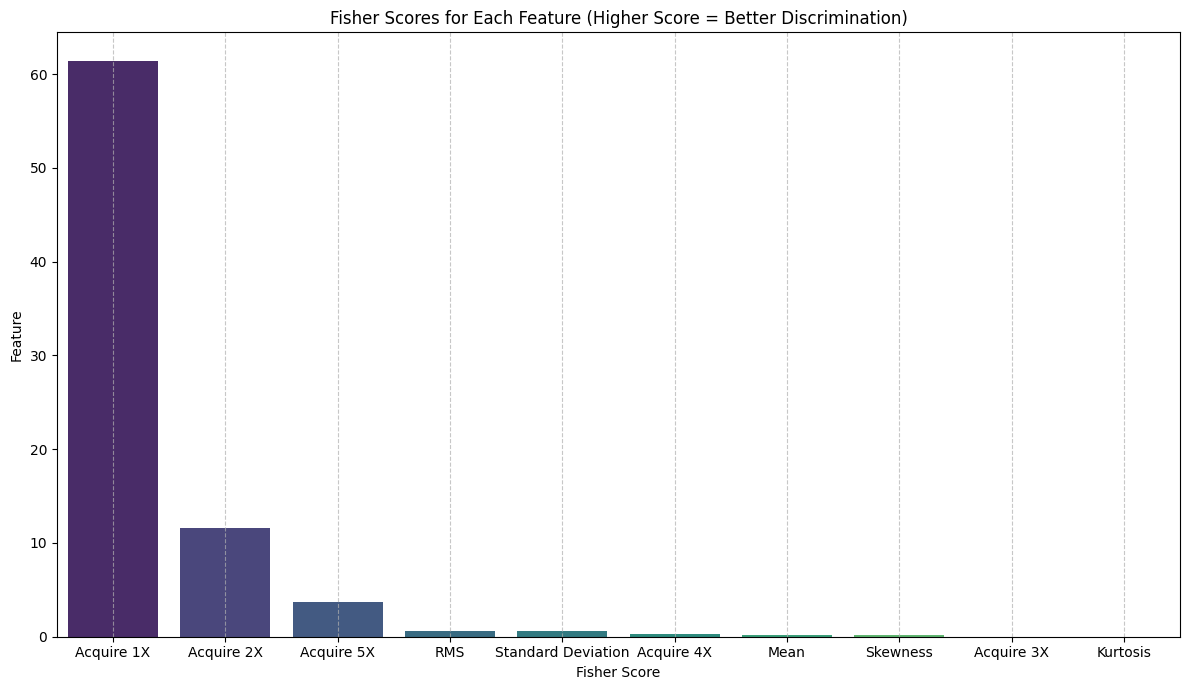

目录已存在: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data
'Fisher_Scores.csv' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Fisher_Scores.csv


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 視覺化費雪公式
plt.figure(figsize=(12, 7))
sns.barplot(y='Fisher Score', x='Feature', data=fisher_scores_df, palette='viridis')
plt.title('Fisher Scores for Each Feature (Higher Score = Better Discrimination)')
plt.xlabel('Fisher Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 定义保存费雪分数的目录
save_directory_fisher_score = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'

# 如果目录不存在，则创建它
if not os.path.exists(save_directory_fisher_score):
    os.makedirs(save_directory_fisher_score)
    print(f"创建目录: {save_directory_fisher_score}")
else:
    print(f"目录已存在: {save_directory_fisher_score}")

# 保存费雪分数到 CSV 文件
output_path_fisher_scores = os.path.join(save_directory_fisher_score, 'Fisher_Scores.csv')
fisher_scores_df.to_csv(output_path_fisher_scores, index=False)
print(f"'Fisher_Scores.csv' 已保存到: {output_path_fisher_scores}")


###**費雪分數轉換成百分比

费雪分数排名和百分比:


,Feature,Fisher Score,Fisher Score Percentage
0,Acquire 1X,61.395944,78.149537
1,Acquire 2X,11.601511,14.767306
2,Acquire 5X,3.714498,4.728102
3,RMS,0.595879,0.758481
4,Standard Deviation,0.595701,0.758255
5,Acquire 4X,0.311476,0.396471
6,Mean,0.191404,0.243634
7,Skewness,0.140338,0.178633
8,Acquire 3X,0.013138,0.016723
9,Kurtosis,0.002246,0.002859


目录已存在: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data
'Fisher_Score_Percentage.csv' 已保存到: /content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/fisher_scores_df.csv


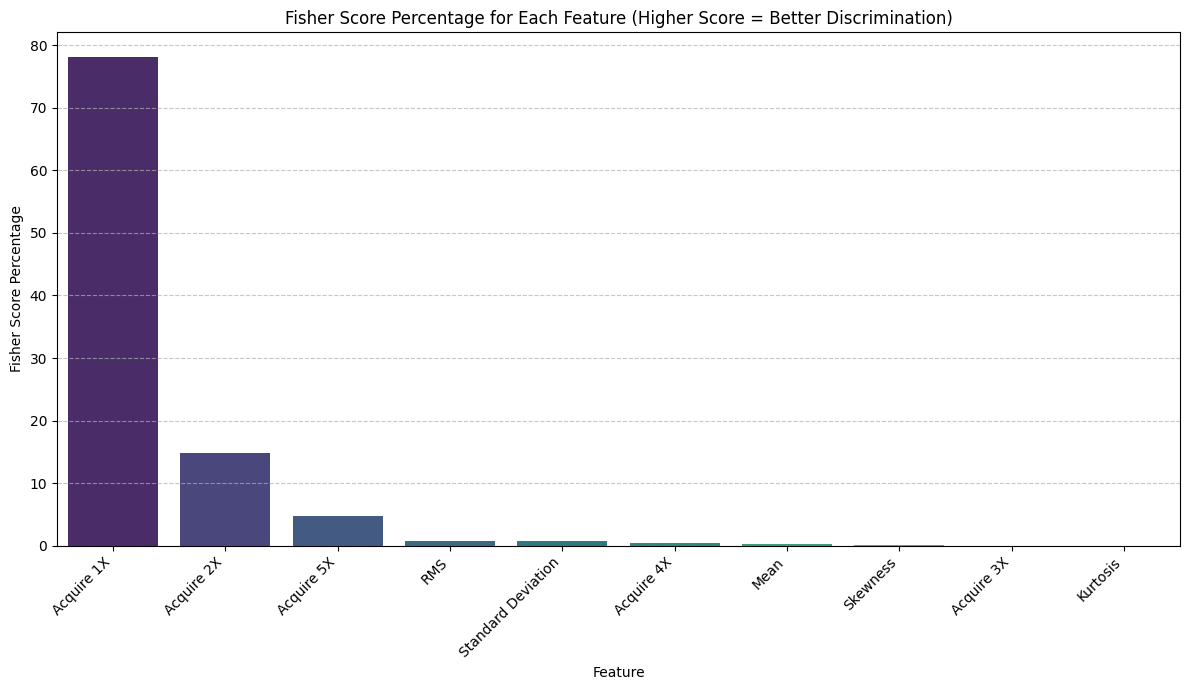

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 定义费雪分数文件路径
fisher_scores_path = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Fisher_Scores.csv'

# 加载费雪分数数据
fisher_scores_df = pd.read_csv(fisher_scores_path)

# 确保 Fisher Score 已经按降序排列 (之前的步骤已经处理)
fisher_scores_df = fisher_scores_df.sort_values(by='Fisher Score', ascending=False).reset_index(drop=True)

# 计算费雪分数的百分比
fisher_scores_df['Fisher Score Percentage'] = (fisher_scores_df['Fisher Score'] / fisher_scores_df['Fisher Score'].sum()) * 100

print("费雪分数排名和百分比:")
display(fisher_scores_df)

# 定义保存费雪分数百分比的目录
save_directory_Fisher_Scores_Percentage_Df = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'

# 如果目录不存在，则创建它
if not os.path.exists(save_directory_Fisher_Scores_Percentage_Df):
    os.makedirs(save_directory_Fisher_Scores_Percentage_Df)
    print(f"创建目录: {save_directory_Fisher_Scores_Percentage_Df}")
else:
    print(f"目录已存在: {save_directory_Fisher_Scores_Percentage_Df}")

# 保存费雪分数到 CSV 文件
Output_Path_Fisher_Score_Percentage = os.path.join(save_directory_Fisher_Scores_Percentage_Df, 'fisher_scores_df.csv')
fisher_scores_df.to_csv(Output_Path_Fisher_Score_Percentage, index=False)
print(f"'Fisher_Score_Percentage.csv' 已保存到: {Output_Path_Fisher_Score_Percentage}")


# 視覺化費雪公式百分比
plt.figure(figsize=(12, 7))
sns.barplot(x='Feature', y='Fisher Score Percentage', data=fisher_scores_df, palette='viridis', hue='Feature', legend=False)
plt.title('Fisher Score Percentage for Each Feature (Higher Score = Better Discrimination)')
plt.xlabel('Feature')
plt.ylabel('Fisher Score Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # 旋轉X軸標籤以避免重疊
plt.tight_layout()
plt.show()

#Step4_Train_LR_Model_PCA

###**載入好的樣本_Healthy_和壞的樣本_Fauty_

###**Define Feature Matrix for model training

In [41]:
import numpy as np
import pandas as pd

# Assuming 'combined_features' DataFrame is available from previous steps.
# It contains both healthy (label=0) and faulty (label=1) data.

# Separate features from labels
X_features = combined_features.drop('label', axis=1)
y_labels = combined_features['label']

# Good sample indices (healthy data, label=0)
# In combined_features, healthy samples (label 0) are typically the first half.
# We can find their indices directly or assume their position based on how combined_features was created.
# Based on combined_features creation (20 healthy, then 20 faulty), healthy samples are at index 0-19.
GoodSampleIndex = y_labels[y_labels == 0].index.values # Get actual indices of healthy samples

# Bad sample indices (faulty data, label=1)
# Faulty samples (label 1) are typically the second half, at index 20-39.
DegradedSampleIndex = y_labels[y_labels == 1].index.values # Get actual indices of faulty samples

# Extract Baseline Data (healthy samples)
BaselineData = X_features.iloc[GoodSampleIndex, :]

# Extract Degraded Data (faulty samples)
DegradedData = X_features.iloc[DegradedSampleIndex, :]

print("BaselineData (Healthy samples) extracted:")
display(BaselineData.head())
print("\nDegradedData (Faulty samples) extracted:")
display(DegradedData.head())

print(f"Number of BaselineData samples: {len(BaselineData)}")
print(f"Number of DegradedData samples: {len(DegradedData)}")


BaselineData (Healthy samples) extracted:


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.526394,-0.115294,-0.326048,0.526460,0.443414,-0.113764,-0.046884,0.761905,-1.202125,0.600665
1,1.941137,-1.130619,-0.103230,1.941130,-0.267375,-1.732480,-1.357348,-0.288272,-0.396726,0.368575
2,-0.352352,0.178928,-0.341666,-0.352273,0.206592,1.020872,1.120139,0.443004,0.042415,0.127172
3,0.303736,-0.424459,-0.273103,0.303823,0.759311,-1.040192,-1.125936,-0.383170,-1.092931,1.053410
4,-0.035195,-0.135220,-0.633529,-0.035102,0.717954,-0.815224,-0.089189,1.905023,2.175729,0.418605



DegradedData (Faulty samples) extracted:


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
20,-1.228275,-0.574376,-0.402623,-1.228113,-0.082132,36.619577,4.458564,1.234530,0.960629,5.720757
21,-1.330923,-0.705792,-0.467360,-1.330759,1.881146,30.902662,4.407968,-1.173518,0.168858,0.749638
22,0.520750,-0.549866,1.048257,0.520828,2.929874,34.593037,7.795399,-0.263037,1.077120,4.392352
23,-1.097638,-0.641537,-0.557455,-1.097483,0.749867,35.033100,6.749591,-0.025836,0.326725,4.979486
24,-0.934487,-0.173043,0.086279,-0.934352,-0.270430,40.521813,5.492692,0.522868,0.976870,4.063534


Number of BaselineData samples: 20
Number of DegradedData samples: 20


##====== Logistic Regression Section========

###初始化"好"與"壞"的矩陣

In [42]:
import numpy as np

# Initialize a NumPy array of size 40 for the labels
# Assuming a total of 40 samples (20 healthy + 20 faulty/unbalance)
Label = np.zeros(40)

# Assign 0.95 to the first 20 elements (healthy set)
Label[0:20] = 0.95

# Assign 0.05 to the next 20 elements (unbalance set)
Label[20:40] = 0.05

print("Generated Label array:")
display(Label)


Generated Label array:


array([0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# --- 1. 準備數據和標籤 ---

# combined_features 和 fisher_scores_df 應在之前的儲存格中已定義
# BaselineData 和 DegradedData 應在之前的儲存格中已定義
# Label 應在之前的儲存格中已定義 (0.95 for healthy, 0.05 for faulty)

# Get the ordered list of features based on Fisher Score
sorted_features = fisher_scores_df['Feature'].tolist()

# Combine BaselineData and DegradedData to form the full feature matrix for training
X_combined = pd.concat([BaselineData, DegradedData], ignore_index=True)

# Prepare the target variable y_train for Logistic Regression
# LogisticRegression in sklearn expects binary class labels (e.g., 0 and 1).
# Assuming 0.95 represents healthy (class 0) and 0.05 represents faulty (class 1).
# We convert the 'Label' array into appropriate binary class labels.
y_train = np.where(Label == 0.95, 0, 1)

# Ensure y_train is a 1D array if it's not already
if y_train.ndim > 1:
    y_train = y_train.ravel()

# Initialize dictionaries to store Logistic Regression models and coefficients
lr_models = {}
lr_coefficients = {}

# --- 2. 訓練羅吉斯迴歸模型 (使用不同的特徵組合) ---

print("開始訓練羅吉斯迴歸模型...")

# 使用費雪分數排名前 2 的特徵訓練模型
top_2_features = sorted_features[0:2]
X_top_2 = X_combined[top_2_features]
model_2_features = LogisticRegression(solver='liblinear', random_state=42) # 'liblinear' works well for small datasets
model_2_features.fit(X_top_2, y_train)
lr_models['model_top_2'] = model_2_features
# MATLAB glmfit returns [intercept; coefficients], so we concatenate them here
lr_coefficients['beta_top_2'] = np.concatenate([model_2_features.intercept_, model_2_features.coef_.flatten()])
print(f"\n選用特徵：{top_2_features}")
print(f"模型係數 (包含截距): {lr_coefficients['beta_top_2']}")

# 使用費雪分數排名前 3 的特徵訓練模型
top_3_features = sorted_features[0:3]
X_top_3 = X_combined[top_3_features]
model_3_features = LogisticRegression(solver='liblinear', random_state=42)
model_3_features.fit(X_top_3, y_train)
lr_models['model_top_3'] = model_3_features
lr_coefficients['beta_top_3'] = np.concatenate([model_3_features.intercept_, model_3_features.coef_.flatten()])
print(f"\n選用特徵：{top_3_features}")
print(f"模型係數 (包含截距): {lr_coefficients['beta_top_3']}")

# 使用費雪分數排名前 4 的特徵訓練模型
top_4_features = sorted_features[0:4]
X_top_4 = X_combined[top_4_features]
model_4_features = LogisticRegression(solver='liblinear', random_state=42)
model_4_features.fit(X_top_4, y_train)
lr_models['model_top_4'] = model_4_features
lr_coefficients['beta_top_4'] = np.concatenate([model_4_features.intercept_, model_4_features.coef_.flatten()])
print(f"\n選用特徵：{top_4_features}")
print(f"模型係數 (包含截距): {lr_coefficients['beta_top_4']}")

# 使用費雪分數排名前 5 的特徵訓練模型
top_5_features = sorted_features[0:5]
X_top_5 = X_combined[top_5_features]
model_5_features = LogisticRegression(solver='liblinear', random_state=42)
model_5_features.fit(X_top_5, y_train)
lr_models['model_top_5'] = model_5_features
lr_coefficients['beta_top_5'] = np.concatenate([model_5_features.intercept_, model_5_features.coef_.flatten()])
print(f"\n選用特徵：{top_5_features}")
print(f"模型係數 (包含截距): {lr_coefficients['beta_top_5']}")

print("\n所有羅吉斯迴歸模型已成功訓練，並已將模型儲存在 'lr_models' 字典中，係數儲存在 'lr_coefficients' 字典中。")


開始訓練羅吉斯迴歸模型...

選用特徵：['Acquire 1X', 'Acquire 2X']
模型係數 (包含截距): [-2.13755216  0.2673482  -0.01005401]

選用特徵：['Acquire 1X', 'Acquire 2X', 'Acquire 5X']
模型係數 (包含截距): [-2.13383628  0.26399114 -0.01173113  0.10513926]

選用特徵：['Acquire 1X', 'Acquire 2X', 'Acquire 5X', 'RMS']
模型係數 (包含截距): [-2.13377766  0.26360227 -0.01174742  0.10438325 -0.00628955]

選用特徵：['Acquire 1X', 'Acquire 2X', 'Acquire 5X', 'RMS', 'Standard Deviation']
模型係數 (包含截距): [-2.13403282  0.26396484 -0.01232231  0.10729864 -0.00412549 -0.00406128]

所有羅吉斯迴歸模型已成功訓練，並已將模型儲存在 'lr_models' 字典中，係數儲存在 'lr_coefficients' 字典中。


####**整理檔案順序，讓資料視覺化的時候能夠判讀

In [49]:
import os

# Create a copy of CV_df to add filenames
CV_df_with_filenames = CV_df.copy()

# Add original filenames to the DataFrame.
# Each row in CV_df corresponds to a column in Combined_Df_Testing,
# which corresponds to a file in file_paths_testing.
# The index of CV_df (0 to len3-1) directly maps to the index of file_paths_testing.
CV_df_with_filenames['Original_Filename'] = [os.path.basename(f) for f in file_paths_testing]

# Sort the DataFrame based on 'CV_top_2' and reset index, keeping the original file order implicitly
CV_df_sorted_with_filenames = CV_df_with_filenames.sort_values(by='CV_top_2', ascending=True).reset_index(drop=True)

print("Sorted Health Values with Original Filenames (first 5 rows):")
display(CV_df_sorted_with_filenames[['Original_Filename', 'CV_top_2', 'CV_top_3', 'CV_top_4', 'CV_top_5']].head())

print("\nSorted Index (new index in sorted DataFrame) and Original Filename (all rows):")
for index, row in CV_df_sorted_with_filenames.iterrows():
    print(f"Index: {index}, Filename: {row['Original_Filename']}")

Sorted Health Values with Original Filenames (first 5 rows):


,Original_Filename,CV_top_2,CV_top_3,CV_top_4,CV_top_5
0,3.Mar-26-14 Time 1607-24.txt,0.000021,0.000015,0.000016,0.000015
1,Mar-26-14 Time 1607-23.txt,0.000046,0.000044,0.000045,0.000044
2,Mar-26-14 Time 1606-22.txt,0.000097,0.000102,0.000103,0.000101
3,Mar-26-14 Time 1606-21.txt,0.000136,0.000123,0.000125,0.000122
4,2.Mar-26-14 Time 1611-25.txt,0.000137,0.000122,0.000124,0.000122



Sorted Index (new index in sorted DataFrame) and Original Filename (all rows):
Index: 0, Filename: 3.Mar-26-14 Time 1607-24.txt
Index: 1, Filename: Mar-26-14 Time 1607-23.txt
Index: 2, Filename: Mar-26-14 Time 1606-22.txt
Index: 3, Filename: Mar-26-14 Time 1606-21.txt
Index: 4, Filename: 2.Mar-26-14 Time 1611-25.txt
Index: 5, Filename: Mar-26-14 Time 1616-26.txt
Index: 6, Filename: Mar-26-14 Time 1617-27.txt
Index: 7, Filename: Mar-26-14 Time 1617-28.txt
Index: 8, Filename: Mar-26-14 Time 1618-29.txt
Index: 9, Filename: 1.Mar-26-14 Time 1618-30.txt
Index: 10, Filename: Mar-26-14 Time 1552-21.txt
Index: 11, Filename: Mar-26-14 Time 1550-15.txt
Index: 12, Filename: Mar-26-14 Time 1551-17.txt
Index: 13, Filename: 8.Mar-26-14 Time 1552-20.txt
Index: 14, Filename: Mar-26-14 Time 1552-19.txt
Index: 15, Filename: 4.Mar-26-14 Time 1551-18.txt
Index: 16, Filename: 6.Mar-26-14 Time 1550-14.txt
Index: 17, Filename: 9.Mar-26-14 Time 1551-16.txt
Index: 18, Filename: 7.Mar-26-14 Time 1550-13.txt
In

##Calculating Health Value (using LR Model)

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# --- 1. Load and Scale Feature_Testing_Vibration ---

# Define paths for cleaned data
save_directory_cleaned_data = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'
output_path_features_healthy = os.path.join(save_directory_cleaned_data, 'Feature_Healthy_Vibration.csv')
output_path_features_testing = os.path.join(save_directory_cleaned_data, 'Feature_Testing_Vibration.csv')

# Load original healthy features to fit the scaler
Feature_Healthy_Vibration_original = pd.read_csv(output_path_features_healthy)

# Set the correct column names for Feature_Healthy_Vibration_original before fitting scaler
new_feature_column_names = [
    'RMS', 'Mean', 'Kurtosis', 'Standard Deviation', 'Skewness',
    'Acquire 1X', 'Acquire 2X', 'Acquire 3X', 'Acquire 4X', 'Acquire 5X'
]
Feature_Healthy_Vibration_original.columns = new_feature_column_names

# Initialize and fit StandardScaler on the healthy training data
scaler_for_testing = StandardScaler()
scaler_for_testing.fit(Feature_Healthy_Vibration_original) # Fit on the healthy data

# Load raw testing features
Feature_Testing_Vibration = pd.read_csv(output_path_features_testing)

# Apply the same column names to testing features for consistency
Feature_Testing_Vibration.columns = new_feature_column_names

# Scale the testing features using the scaler fitted on healthy training data
Feature_Testing_Vibration_scaled = pd.DataFrame(
    scaler_for_testing.transform(Feature_Testing_Vibration),
    columns=Feature_Testing_Vibration.columns
)

print("Scaled Feature_Testing_Vibration (first 5 rows):")
display(Feature_Testing_Vibration_scaled.head())

# --- 2. Calculate Health Value (CV) for Testing Data ---

# model_configs and lr_models are assumed to be available from Fv41Rq4hI42G
# sorted_features is also assumed to be available from previous cells

# Dictionary to store the calculated Health Values
CV_results = {}

# Use the same model_configs structure as in Fv41Rq4hI42G to get feature sets
model_configs_for_cv = {
    'model_top_2': sorted_features[0:2],
    'model_top_3': sorted_features[0:3],
    'model_top_4': sorted_features[0:4],
    'model_top_5': sorted_features[0:5]
}

for model_key, features_used in model_configs_for_cv.items():
    # Select the features for the current model from the scaled testing data
    X_test_subset = Feature_Testing_Vibration_scaled[features_used]

    # Retrieve the trained Logistic Regression model
    model = lr_models[model_key]

    # Predict probabilities. predict_proba returns [prob_class_0, prob_class_1]
    # Our y_train was 0 for healthy and 1 for faulty. So, prob_class_0 is 'healthy' probability.
    health_values = model.predict_proba(X_test_subset)[:, 0]

    # Store the results
    CV_results[f'CV_{model_key.replace("model_", "")}'] = health_values

print("\nCalculated Health Values (first 5 entries for each model):")
for key, value in CV_results.items():
    print(f"{key}: {value[:5]}")

# Optionally, you can convert CV_results to a DataFrame for easier viewing
CV_df = pd.DataFrame(CV_results)
print("\nHealth Values DataFrame (first 5 rows):")
display(CV_df.head())


Scaled Feature_Testing_Vibration (first 5 rows):


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,-0.879211,-0.954513,-0.516306,-0.879081,0.425327,-0.487124,-1.230884,0.323472,-1.052539,1.543094
1,-0.681960,-0.761200,-0.515795,-0.681829,0.166946,45.583667,6.011255,1.475313,0.193975,1.859210
2,-1.077277,-0.911377,-0.461308,-1.077135,-0.129953,5.079867,0.037586,0.563303,-0.933381,-0.090534
3,-0.601892,11.521695,-0.426477,-0.613763,0.242409,23.068307,6.331221,0.186886,-0.502872,0.134718
4,-0.430733,-0.084877,-0.383868,-0.430626,1.053420,-0.281570,0.511588,-0.000364,-0.546476,0.046493



Calculated Health Values (first 5 entries for each model):
CV_top_2: [9.05116053e-01 4.59127441e-05 6.85644926e-01 1.85955199e-02
 9.01851901e-01]
CV_top_3: [8.89510751e-01 4.42856693e-05 6.90563707e-01 1.99205039e-02
 9.01079891e-01]
CV_top_4: [8.89054754e-01 4.49496215e-05 6.89509973e-01 2.00248583e-02
 9.00827017e-01]
CV_top_5: [8.88417735e-01 4.40803060e-05 6.88793535e-01 1.99064401e-02
 9.00800128e-01]

Health Values DataFrame (first 5 rows):


,CV_top_2,CV_top_3,CV_top_4,CV_top_5
0,0.905116,0.889511,0.889055,0.888418
1,0.000046,0.000044,0.000045,0.000044
2,0.685645,0.690564,0.689510,0.688794
3,0.018596,0.019921,0.020025,0.019906
4,0.901852,0.901080,0.900827,0.900800


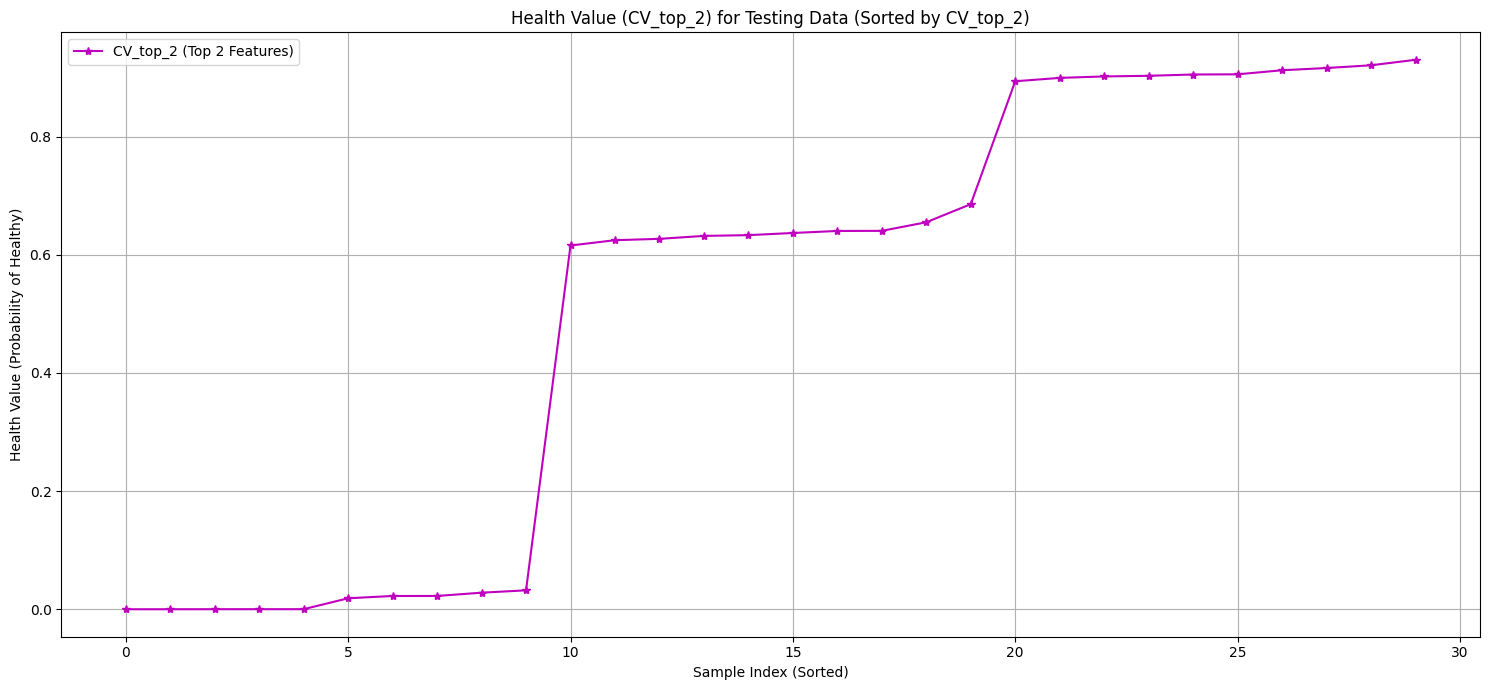

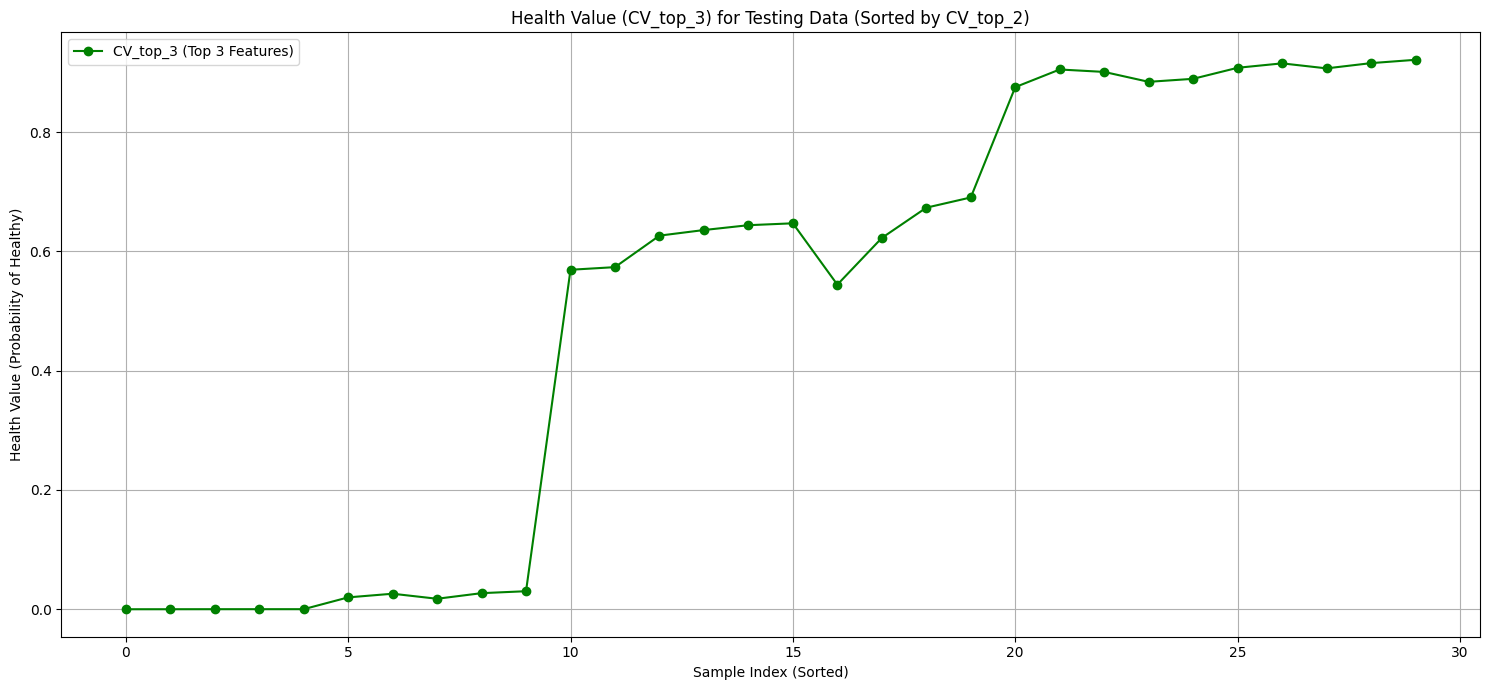

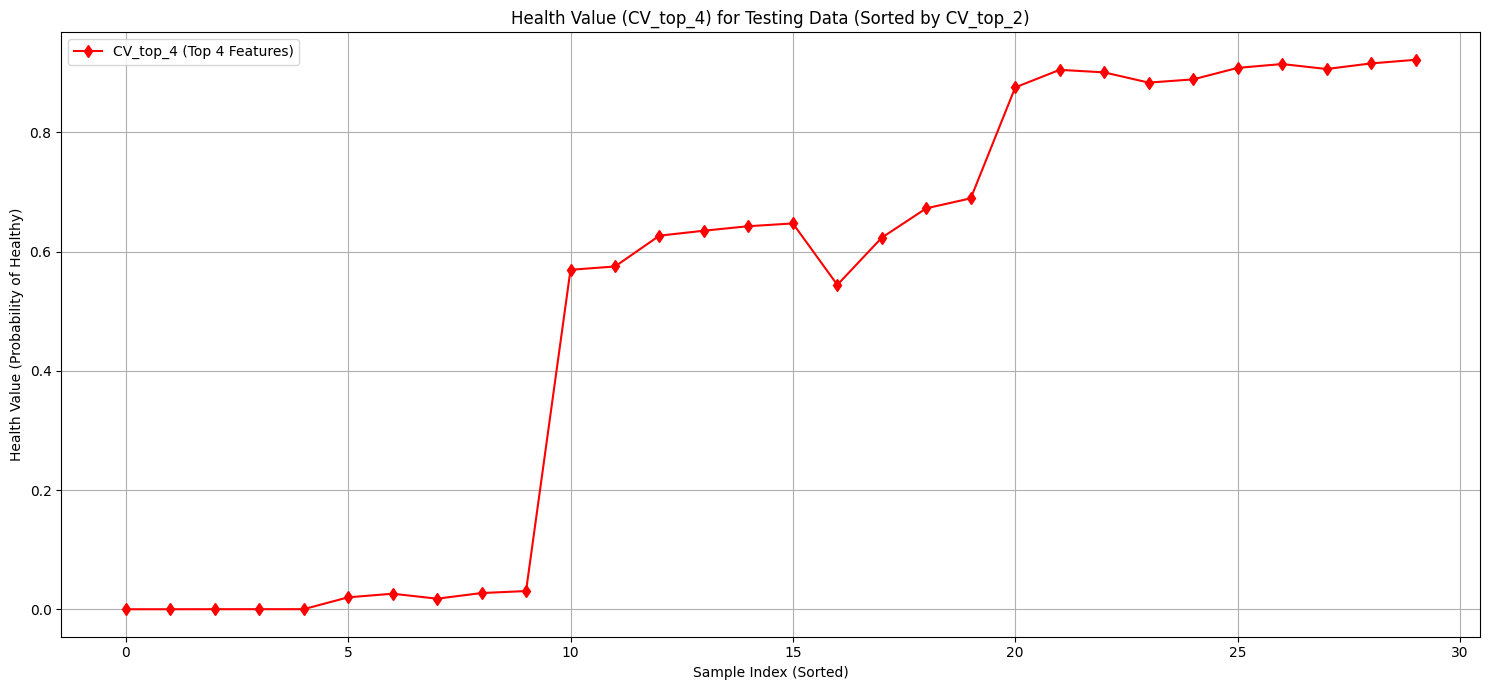

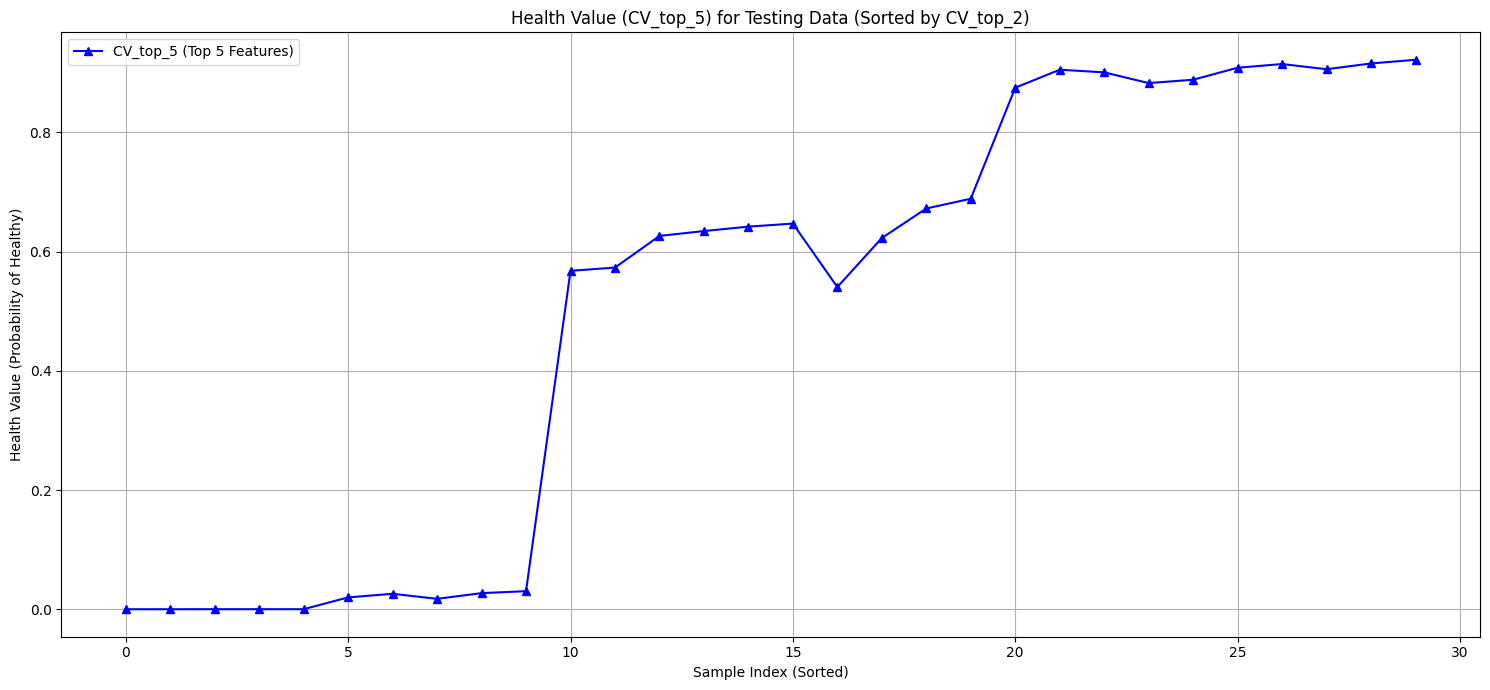

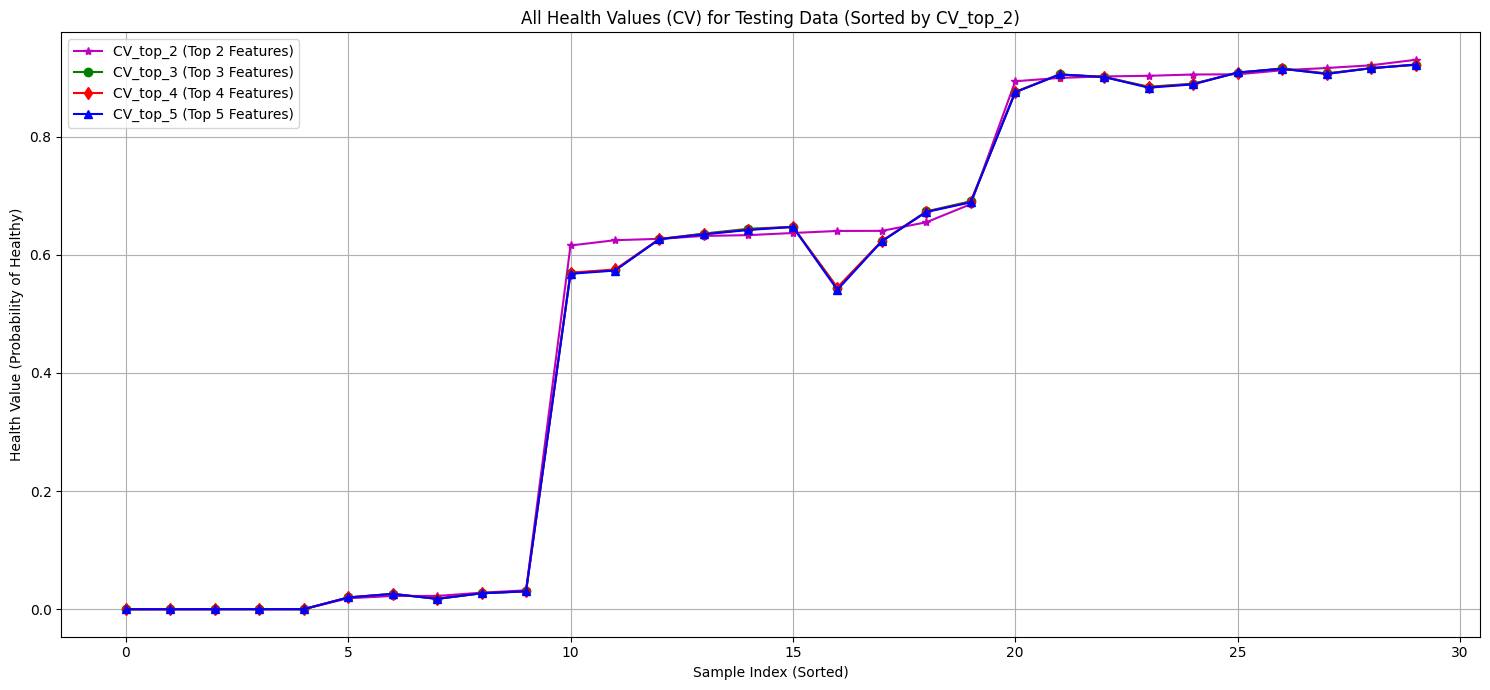

In [53]:
import matplotlib.pyplot as plt

# Assuming CV_df is available from the previous step (vN4iS50XLMZI)

# Sort CV_df based on 'CV_top_2' to put values less than 0.4 on the left
CV_df_sorted = CV_df.sort_values(by='CV_top_2', ascending=True).reset_index(drop=True)

# Define the CV series and their plotting styles
cv_series = {
    'CV_top_2': {'label': 'CV_top_2 (Top 2 Features)', 'style': 'm*-'},
    'CV_top_3': {'label': 'CV_top_3 (Top 3 Features)', 'style': 'go-'},
    'CV_top_4': {'label': 'CV_top_4 (Top 4 Features)', 'style': 'rd-'},
    'CV_top_5': {'label': 'CV_top_5 (Top 5 Features)', 'style': 'b^-'}
}

# --- Plot each CV series separately ---
for col_name, config in cv_series.items():
    plt.figure(figsize=(15, 7))
    plt.plot(CV_df_sorted[col_name], config['style'], label=config['label'])
    plt.title(f'Health Value ({col_name}) for Testing Data (Sorted by CV_top_2)')
    plt.xlabel('Sample Index (Sorted)')
    plt.ylabel('Health Value (Probability of Healthy)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Plot all CV series overlaid on a single figure ---
plt.figure(figsize=(15, 7))
for col_name, config in cv_series.items():
    plt.plot(CV_df_sorted[col_name], config['style'], label=config['label'])

plt.title('All Health Values (CV) for Testing Data (Sorted by CV_top_2)')
plt.xlabel('Sample Index (Sorted)')
plt.ylabel('Health Value (Probability of Healthy)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#Step5_Train_SVM_Model

# Task
Load the `Feature_Healthy_Vibration_Scaled.csv`, `Feature_Faulty_Vibration_Scaled.csv`, and `Feature_Testing_Vibration_Scaled.csv` files, then prepare the training features `X` and labels `y` from the healthy and faulty data using the top 2 features ('Acquire 1X' and 'Acquire 2X'), and finally prepare the testing features `X_Testing` from the testing data using the same top 2 features for SVM model training.

## Load Scaled Feature Data

### Subtask:
Load the `Feature_Healthy_Vibration_Scaled.csv`, `Feature_Faulty_Vibration_Scaled.csv`, and `Feature_Testing_Vibration_Scaled.csv` files into pandas DataFrames. These files are assumed to be already scaled, so no further normalization will be applied.


**Reasoning**:
The subtask requires loading three scaled feature CSV files into pandas DataFrames and then displaying the head of each DataFrame to verify successful loading. This step directly addresses the instructions by defining the paths and using `pd.read_csv`.



In [56]:
import pandas as pd
import os

# Define the directory where scaled data is saved
save_directory_scaled_data = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data'

# 1. Load Feature_Healthy_Vibration_Scaled.csv
output_path_scaled_healthy = os.path.join(save_directory_scaled_data, 'Feature_Healthy_Vibration_Scaled.csv')
Feature_Healthy_Vibration_Scaled_df = pd.read_csv(output_path_scaled_healthy)

# 2. Load Feature_Faulty_Vibration_Scaled.csv
output_path_scaled_faulty = os.path.join(save_directory_scaled_data, 'Feature_Faulty_Vibration_Scaled.csv')
Feature_Faulty_Vibration_Scaled_df = pd.read_csv(output_path_scaled_faulty)

# 3. Load Feature_Testing_Vibration_Scaled.csv
output_path_scaled_testing = os.path.join(save_directory_scaled_data, 'Feature_Testing_Vibration.csv') # Note: The existing cell saves testing data as 'Feature_Testing_Vibration.csv'
Feature_Testing_Vibration_Scaled_df = pd.read_csv(output_path_scaled_testing)

# 4. Display the first few rows of each DataFrame
print("Feature_Healthy_Vibration_Scaled_df (first 5 rows):")
display(Feature_Healthy_Vibration_Scaled_df.head())

print("\nFeature_Faulty_Vibration_Scaled_df (first 5 rows):")
display(Feature_Faulty_Vibration_Scaled_df.head())

print("\nFeature_Testing_Vibration_Scaled_df (first 5 rows):")
display(Feature_Testing_Vibration_Scaled_df.head())

Feature_Healthy_Vibration_Scaled_df (first 5 rows):


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.526394,-0.115294,-0.326048,0.526460,0.443414,-0.113764,-0.046884,0.761905,-1.202125,0.600665
1,1.941137,-1.130619,-0.103230,1.941130,-0.267375,-1.732480,-1.357348,-0.288272,-0.396726,0.368575
2,-0.352352,0.178928,-0.341666,-0.352273,0.206592,1.020872,1.120139,0.443004,0.042415,0.127172
3,0.303736,-0.424459,-0.273103,0.303823,0.759311,-1.040192,-1.125936,-0.383170,-1.092931,1.053410
4,-0.035195,-0.135220,-0.633529,-0.035102,0.717954,-0.815224,-0.089189,1.905023,2.175729,0.418605



Feature_Faulty_Vibration_Scaled_df (first 5 rows):


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,-1.228275,-0.574376,-0.402623,-1.228113,-0.082132,36.619577,4.458564,1.234530,0.960629,5.720757
1,-1.330923,-0.705792,-0.467360,-1.330759,1.881146,30.902662,4.407968,-1.173518,0.168858,0.749638
2,0.520750,-0.549866,1.048257,0.520828,2.929874,34.593037,7.795399,-0.263037,1.077120,4.392352
3,-1.097638,-0.641537,-0.557455,-1.097483,0.749867,35.033100,6.749591,-0.025836,0.326725,4.979486
4,-0.934487,-0.173043,0.086279,-0.934352,-0.270430,40.521813,5.492692,0.522868,0.976870,4.063534



Feature_Testing_Vibration_Scaled_df (first 5 rows):


,RMS,Mean,Kurtosis,Standard Deviation,Skewness,Acquire 1X,Acquire 2X,Acquire 3X,Acquire 4X,Acquire 5X
0,0.063025,-0.000182,0.064515,0.063025,-0.065209,0.000987,0.000729,0.008293,0.001160,0.004157
1,0.066520,-0.000096,0.065086,0.066520,-0.092985,0.027356,0.007852,0.011656,0.003057,0.004495
2,0.059516,-0.000163,0.125953,0.059515,-0.124902,0.004173,0.001976,0.008993,0.001341,0.002411
3,0.067939,0.005371,0.164864,0.067726,-0.084873,0.014469,0.008166,0.007894,0.001997,0.002651
4,0.070971,0.000205,0.212464,0.070971,0.002312,0.001105,0.002442,0.007347,0.001930,0.002557


**Reasoning**:
The subtask requires preparing the training features `X` and labels `y` from the scaled healthy and faulty data using the top 2 features, and preparing the testing features `X_Testing` from the scaled testing data with the same features. This step involves selecting the relevant columns and concatenating dataframes, as well as creating the corresponding labels for SVM model training.



In [58]:
import numpy as np

# Define the top 2 features based on previous Fisher Score analysis
# Assuming 'fisher_scores_df' is available and sorted, and 'sorted_features' list is available
top_2_features = ['Acquire 1X', 'Acquire 2X'] # Explicitly define based on previous output

# Prepare training features (X) and labels (y)

# 1. Extract healthy features using the top 2 features
X_healthy = Feature_Healthy_Vibration_Scaled_df[top_2_features]

# 2. Create labels for healthy data (0)
y_healthy = np.zeros(len(X_healthy))

# 3. Extract faulty features using the top 2 features
X_faulty = Feature_Faulty_Vibration_Scaled_df[top_2_features]

# 4. Create labels for faulty data (1)
y_faulty = np.ones(len(X_faulty))

# 5. Concatenate healthy and faulty features to form the complete training features X
X = pd.concat([X_healthy, X_faulty], ignore_index=True)

# 6. Concatenate healthy and faulty labels to form the complete training labels y
y = np.concatenate([y_healthy, y_faulty])

# Prepare testing features (X_Testing) using the same top 2 features
X_Testing = Feature_Testing_Vibration_Scaled_df[top_2_features]

# Display the first few rows of X, y, and X_Testing to verify
print("Training Features (X) head:")
display(X.head())
print("\nTraining Labels (y) head:")
display(pd.Series(y).head())
print("\nTesting Features (X_Testing) head:")
display(X_Testing.head())

Training Features (X) head:


,Acquire 1X,Acquire 2X
0,-0.113764,-0.046884
1,-1.732480,-1.357348
2,1.020872,1.120139
3,-1.040192,-1.125936
4,-0.815224,-0.089189



Training Labels (y) head:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0



Testing Features (X_Testing) head:


,Acquire 1X,Acquire 2X
0,0.000987,0.000729
1,0.027356,0.007852
2,0.004173,0.001976
3,0.014469,0.008166
4,0.001105,0.002442


## Adjust Training Labels for SVM

### Subtask:
Adjust the training labels `y` to be 1 for healthy samples and -1 for faulty samples, as typically expected by some SVM implementations.


**Reasoning**:
The subtask requires adjusting the training labels `y` from 0/1 to 1/-1. I will use `np.where` to efficiently replace 0s with 1s and 1s with -1s in the `y` array and then display its head.



In [63]:
import numpy as np

# Adjust the training labels 'y' for SVM
# Replace 0 (healthy) with 1
# Replace 1 (faulty) with -1
y = np.where(y == 0, 1, -1)

print("Updated Training Labels (y) for SVM (head):")
display(pd.Series(y).head())

print("Updated Training Labels (y) for SVM (tail):")
display(pd.Series(y).tail())

Updated Training Labels (y) for SVM (head):


,0
0,-1
1,-1
2,-1
3,-1
4,-1


Updated Training Labels (y) for SVM (tail):


,0
35,-1
36,-1
37,-1
38,-1
39,-1


**Reasoning**:
The previous execution of `np.where(y == 0, 1, -1)` resulted in `y` being entirely `[-1, -1, ..., -1]` according to the kernel state, which is inconsistent with the desired outcome of `[1, ..., 1, -1, ..., -1]` (1 for healthy, -1 for faulty). This indicates that the `y` array was not in the expected `[0, ..., 0, 1, ..., 1]` state when the transformation was applied, or the previous display was misleading. To ensure correctness and fulfill the subtask, I will first reconstruct the `y` array from its healthy (0) and faulty (1) components, then correctly transform it to `1` for healthy and `-1` for faulty.



In [62]:
import numpy as np
import pandas as pd

# Reconstruct initial y from X_healthy and X_faulty to ensure correct base state
# Assuming X_healthy and X_faulty are available from previous steps and have 20 samples each.
# If these variables are not available or are empty, this step would require loading them again.
# Based on the kernel state, X_healthy and X_faulty are DataFrames with the correct number of rows.

y_healthy_reconstructed = np.zeros(len(X_healthy))  # Healthy samples are 0
y_faulty_reconstructed = np.ones(len(X_faulty))   # Faulty samples are 1
y_initial = np.concatenate([y_healthy_reconstructed, y_faulty_reconstructed])

# Adjust the training labels 'y' for SVM as per the subtask:
# Replace 0 (healthy) with 1
# Replace 1 (faulty) with -1
y = np.where(y_initial == 0, 1, -1)

print("Reconstructed and Updated Training Labels (y) for SVM (head):")
display(pd.Series(y).head())

print("Reconstructed and Updated Training Labels (y) for SVM (tail):")
display(pd.Series(y).tail())

Reconstructed and Updated Training Labels (y) for SVM (head):


,0
0,1
1,1
2,1
3,1
4,1


Reconstructed and Updated Training Labels (y) for SVM (tail):


,0
35,-1
36,-1
37,-1
38,-1
39,-1


Step 0: Mounting Google Drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Step 1: Loading Data
Healthy data shape: (20, 10)
Faulty data shape: (20, 10)
Healthy columns: ['RMS', 'Mean', 'Kurtosis', 'Standard Deviation', 'Skewness', 'Acquire 1X', 'Acquire 2X', 'Acquire 3X', 'Acquire 4X', 'Acquire 5X']
Training data shape: (40, 10)
Testing data shape: (30, 10)

Step 2: Normalization
Normalization completed

Step 3: Feature Selection
Feature matrix X shape: (40, 2)
Labels y shape: (40,)
Feature names: ['Acquire 1X', 'Acquire 2X']

Step 4: Visualizing Training Data


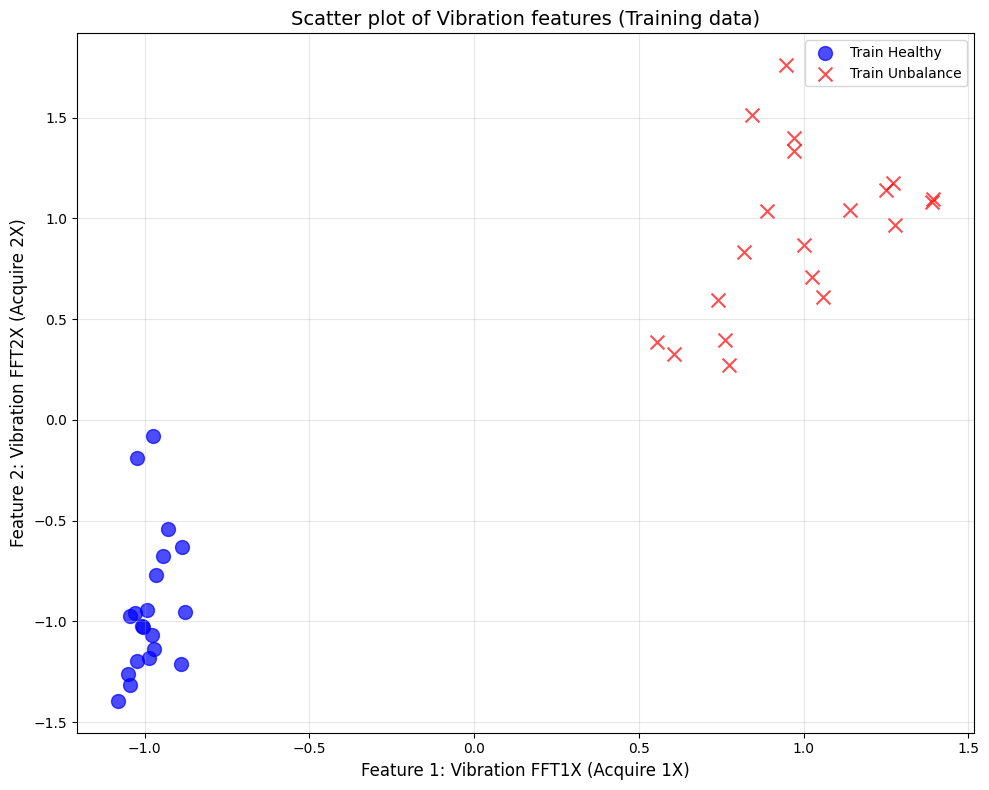


Step 5: Training Linear SVM
Linear SVM trained successfully
Class names: [0. 1.]
Number of support vectors: [1 1]
Support vectors shape: (2, 2)
Weight vector w: [-1.19643669 -0.3650169 ]
Bias b: -0.19615172917585932

Step 6: Plotting Linear SVM Decision Boundary


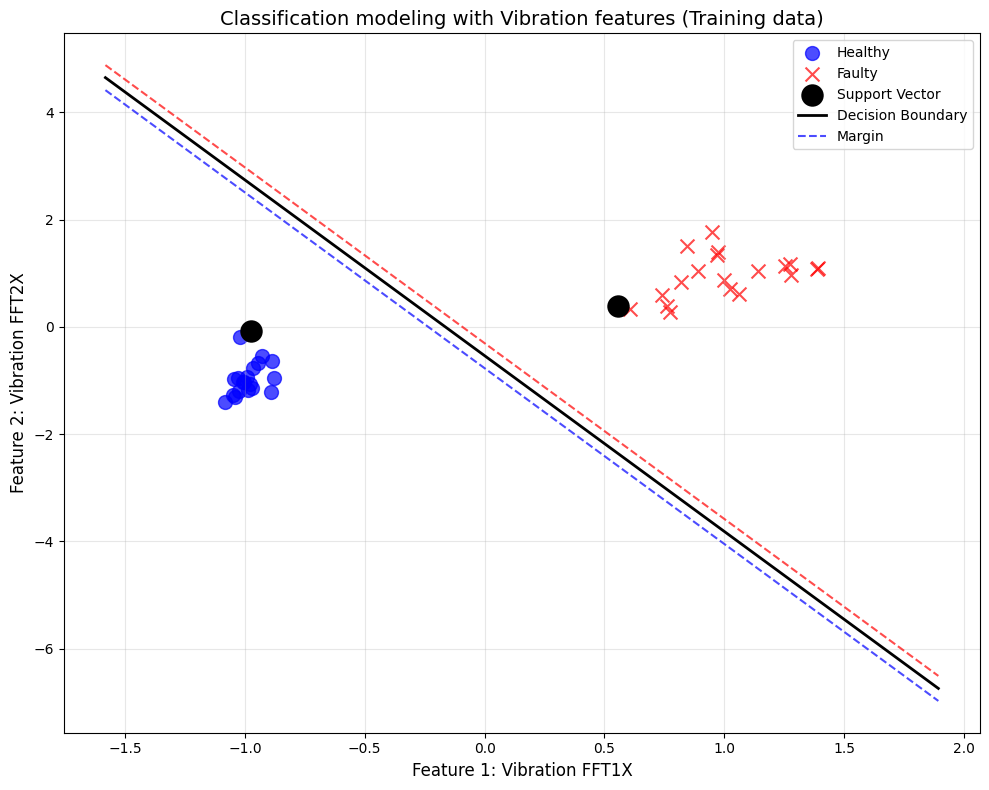


Step 7: Training RBF SVM with Cross-Validation
RBF SVM trained successfully
Number of support vectors: [3 2]
Cross-validation accuracy: 1.0000
Cross-validation error (class loss): 0.0000


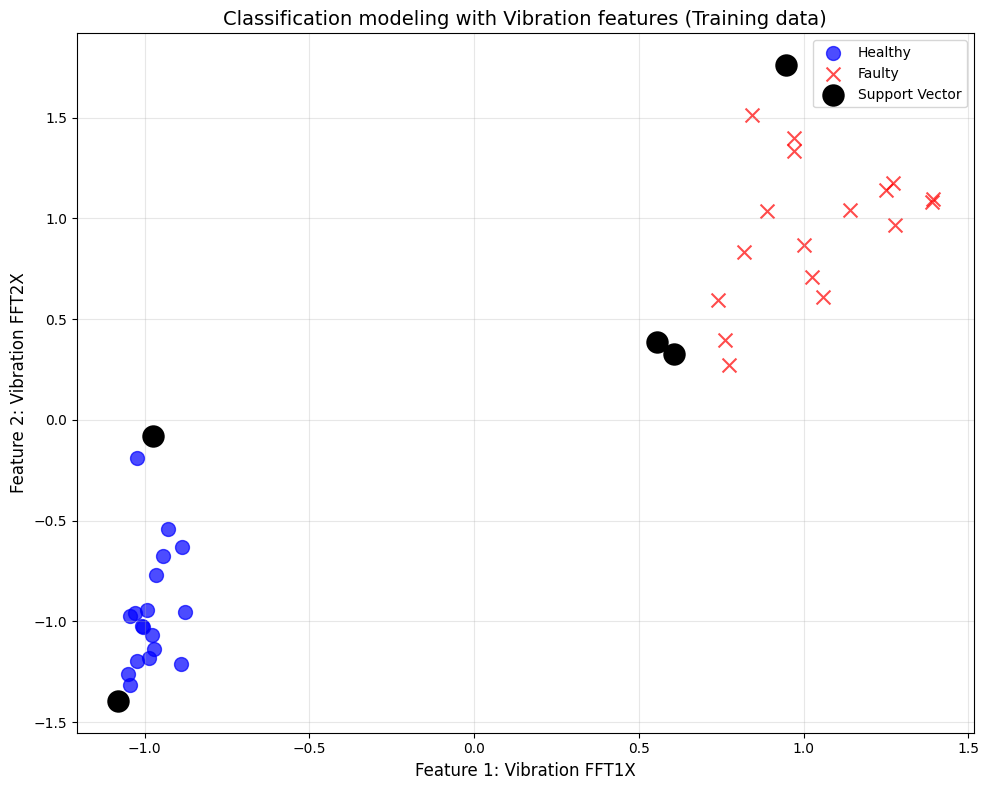


Step 8: Plotting Decision Regions


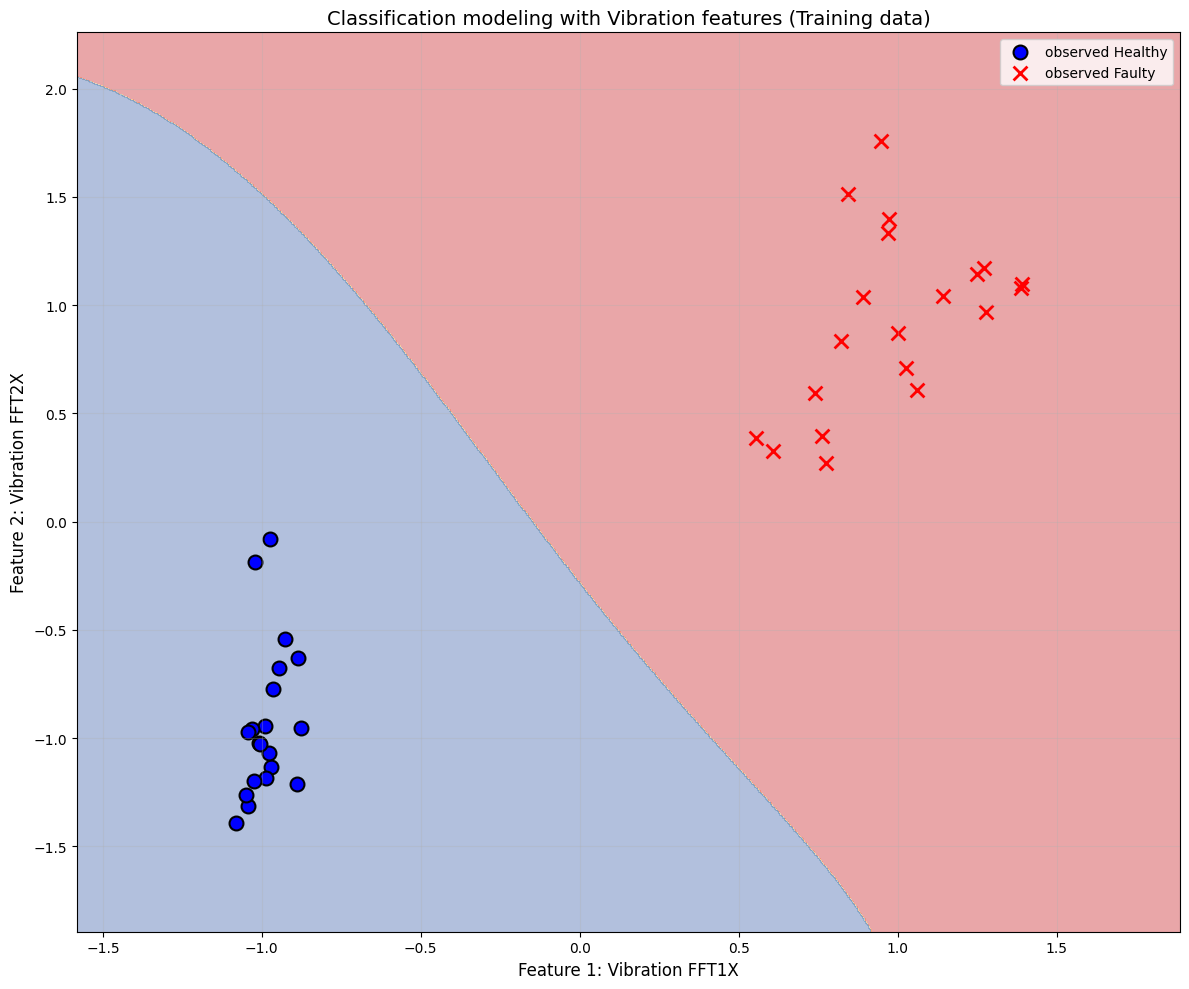


Step 9: Testing on Test Data

Prediction Results:
   TrueLabel PredictedLabel     Score
0    Healthy        Healthy  1.125550
1    Healthy        Healthy  1.000616
2    Healthy        Healthy  1.089455
3    Healthy        Healthy  1.031547
4    Healthy        Healthy  1.132115
5    Healthy        Healthy  1.011342
6    Healthy        Healthy  1.132467
7    Healthy        Healthy  1.080224
8    Healthy        Healthy  1.115316
9    Healthy        Healthy  1.069454
10   Healthy        Healthy  1.098942
11   Healthy        Healthy  1.086106
12   Healthy        Healthy  1.085164
13   Healthy        Healthy  1.117331
14   Healthy        Healthy  1.129028
15   Healthy        Healthy  0.937228
16   Healthy        Healthy  1.035271
17   Healthy        Healthy  1.052371
18   Healthy        Healthy  1.113758
19   Healthy        Healthy  1.071634
20    Faulty         Faulty -1.153137
21    Faulty         Faulty -1.157563
22    Faulty         Faulty -1.000158
23    Faulty         Faulty -1.137841

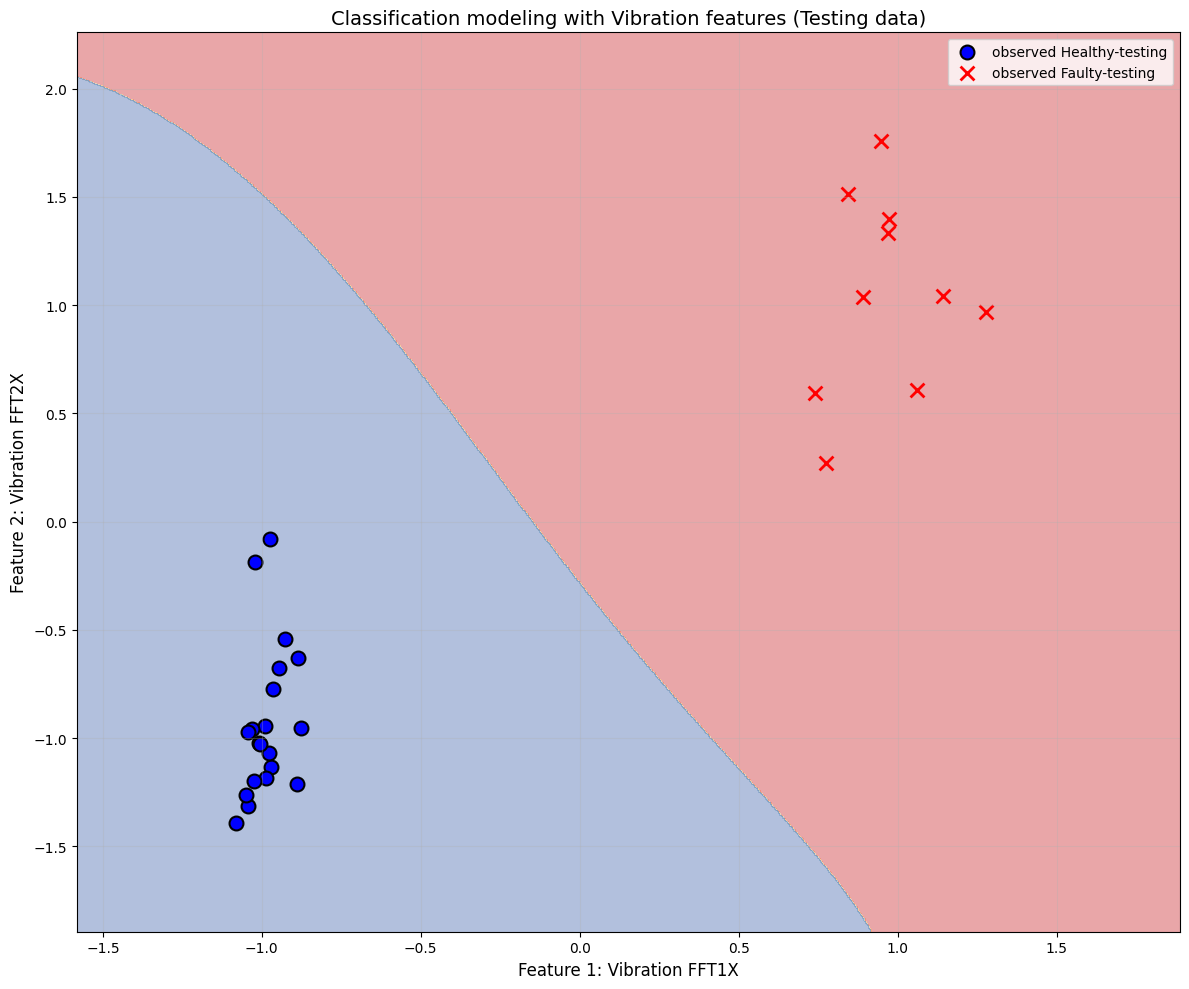


Step 11: Confusion Matrix

Confusion Matrix:
[[10  0]
 [ 0 20]]


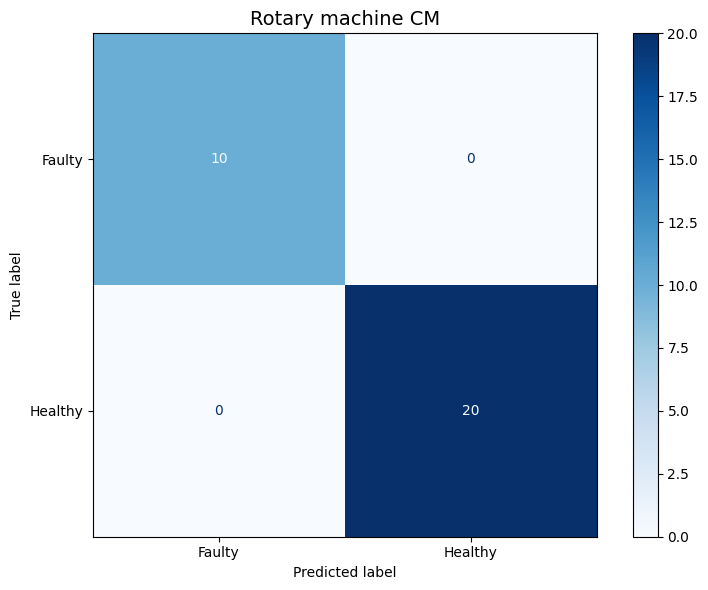


Classification Report:
              precision    recall  f1-score   support

      Faulty       1.00      1.00      1.00        10
     Healthy       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


All steps completed successfully!


In [65]:
"""
Support Vector Machine (SVM) Algorithm - Python Version
Converted from MATLAB code Step5_Train_SVM_Model.m
Author: Converted for Colab
Date: 2024/12/11
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

# ============================================================================
# 0. Mount Google Drive
# ============================================================================
print("=" * 60)
print("Step 0: Mounting Google Drive")
print("=" * 60)

from google.colab import drive
drive.mount('/content/drive')

# ============================================================================
# 1. Load Data from CSV files
# ============================================================================
print("\n" + "=" * 60)
print("Step 1: Loading Data")
print("=" * 60)

# Define file paths
healthy_file_path = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Healthy_Vibration_Scaled.csv'
faulty_file_path = '/content/drive/MyDrive/ML_Exercise1_Rotary_machine/data/Clean_data/Feature_Faulty_Vibration_Scaled.csv'

# Load training data (Healthy and Faulty)
healthy_data = pd.read_csv(healthy_file_path)
faulty_data = pd.read_csv(faulty_file_path)

print(f"Healthy data shape: {healthy_data.shape}")
print(f"Faulty data shape: {faulty_data.shape}")
print(f"Healthy columns: {healthy_data.columns.tolist()}")

# Combine training data: first 20 Healthy, then 20 Faulty
Feature_all_vibration = np.vstack([
    healthy_data.values[:20],  # First 20 Healthy samples
    faulty_data.values[:20]    # First 20 Faulty samples
])

# For testing data: 20 Healthy + 10 Faulty
# If we don't have enough, we'll use remaining samples or repeat
Feature_testing_vibration = np.vstack([
    healthy_data.values[:20],  # 20 Healthy samples
    faulty_data.values[:10]    # 10 Faulty samples
])

print(f"Training data shape: {Feature_all_vibration.shape}")
print(f"Testing data shape: {Feature_testing_vibration.shape}")

# ============================================================================
# 2. Normalization (Standardization)
# ============================================================================
print("\n" + "=" * 60)
print("Step 2: Normalization")
print("=" * 60)

# Calculate mean and std from training data
mean_feature_all = np.mean(Feature_all_vibration, axis=0)
std_feature_all = np.std(Feature_all_vibration, axis=0)

# Normalize training data
Feature_all_vibration_norm = (Feature_all_vibration - mean_feature_all) / std_feature_all

# Normalize testing data using training data's mean and std
Feature_testing_vibration_norm = (Feature_testing_vibration - mean_feature_all) / std_feature_all

print("Normalization completed")

# ============================================================================
# 3. Define Feature Matrix for Model Training
# ============================================================================
print("\n" + "=" * 60)
print("Step 3: Feature Selection")
print("=" * 60)

# Select features: columns 6 and 7 (indices 5 and 6 in Python)
# These correspond to "Acquire 1X" and "Acquire 2X"
feature_indices = [5, 6]  # 0-indexed: columns 6 and 7
X = Feature_all_vibration_norm[:, feature_indices]

# Create labels: first 20 samples are Healthy (y=1), next 20 are Faulty (y=-1)
y = np.concatenate([np.ones(20), -np.ones(20)])

print(f"Feature matrix X shape: {X.shape}")
print(f"Labels y shape: {y.shape}")
print(f"Feature names: {healthy_data.columns[feature_indices].tolist()}")

# ============================================================================
# 4. Plot Original Data for Visual Inspection
# ============================================================================
print("\n" + "=" * 60)
print("Step 4: Visualizing Training Data")
print("=" * 60)

plt.figure(figsize=(10, 8))
healthy_idx = y == 1
faulty_idx = y == -1

plt.scatter(X[healthy_idx, 0], X[healthy_idx, 1], c='blue', marker='o',
            label='Train Healthy', s=100, alpha=0.7)
plt.scatter(X[faulty_idx, 0], X[faulty_idx, 1], c='red', marker='x',
            label='Train Unbalance', s=100, alpha=0.7)
plt.xlabel('Feature 1: Vibration FFT1X (Acquire 1X)', fontsize=12)
plt.ylabel('Feature 2: Vibration FFT2X (Acquire 2X)', fontsize=12)
plt.title('Scatter plot of Vibration features (Training data)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 5. Train Linear SVM Classifier (without parameters)
# ============================================================================
print("\n" + "=" * 60)
print("Step 5: Training Linear SVM")
print("=" * 60)

# Convert labels: sklearn uses 0 and 1, so we need to convert -1 to 0
y_sklearn = (y + 1) // 2  # Convert -1,1 to 0,1

# Train linear SVM
SVMModel = SVC(kernel='linear', C=1.0)
SVMModel.fit(X, y_sklearn)

print("Linear SVM trained successfully")
print(f"Class names: {SVMModel.classes_}")
print(f"Number of support vectors: {SVMModel.n_support_}")

# Get support vectors
sv = SVMModel.support_vectors_
print(f"Support vectors shape: {sv.shape}")

# Get coefficients for decision boundary
# For linear SVM: decision function = w^T * x + b = 0
w = SVMModel.coef_[0]
b = SVMModel.intercept_[0]

print(f"Weight vector w: {w}")
print(f"Bias b: {b}")

# ============================================================================
# 6. Plot Linear SVM with Decision Boundary
# ============================================================================
print("\n" + "=" * 60)
print("Step 6: Plotting Linear SVM Decision Boundary")
print("=" * 60)

plt.figure(figsize=(10, 8))

# Plot data points
plt.scatter(X[healthy_idx, 0], X[healthy_idx, 1], c='blue', marker='o',
            label='Healthy', s=100, alpha=0.7)
plt.scatter(X[faulty_idx, 0], X[faulty_idx, 1], c='red', marker='x',
            label='Faulty', s=100, alpha=0.7)

# Plot support vectors
plt.scatter(sv[:, 0], sv[:, 1], c='black', marker='o', s=200,
            facecolors='none', edgecolors='black', linewidths=2,
            label='Support Vector', zorder=10)

# Plot decision boundary: w[0]*x1 + w[1]*x2 + b = 0
# => x2 = -(w[0]/w[1])*x1 - b/w[1]
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x1_line = np.linspace(x1_min, x1_max, 100)
x2_line = -(w[0] / w[1]) * x1_line - b / w[1]
plt.plot(x1_line, x2_line, 'k-', linewidth=2, label='Decision Boundary')

# Plot margin boundaries
# Margin half-width: m = 1 / ||w||
m = 1 / np.sqrt(w[0]**2 + w[1]**2)
x2_margin_high = x2_line + w[1] * m**2
x2_margin_low = x2_line - w[1] * m**2
plt.plot(x1_line, x2_margin_high, 'b--', linewidth=1.5, alpha=0.7, label='Margin')
plt.plot(x1_line, x2_margin_low, 'r--', linewidth=1.5, alpha=0.7)

plt.xlabel('Feature 1: Vibration FFT1X', fontsize=12)
plt.ylabel('Feature 2: Vibration FFT2X', fontsize=12)
plt.title('Classification modeling with Vibration features (Training data)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 7. Train RBF SVM with Cross-Validation
# ============================================================================
print("\n" + "=" * 60)
print("Step 7: Training RBF SVM with Cross-Validation")
print("=" * 60)

# Train RBF SVM (equivalent to MATLAB's 'KernelFunction','RBF','KernelScale','auto')
SVMModel2 = SVC(kernel='rbf', gamma='scale', C=1.0)
SVMModel2.fit(X, y_sklearn)

print("RBF SVM trained successfully")
print(f"Number of support vectors: {SVMModel2.n_support_}")

# Cross-validation
cv_scores = cross_val_score(SVMModel2, X, y_sklearn, cv=10)
class_loss = 1 - cv_scores.mean()
accuracy = cv_scores.mean()

print(f"Cross-validation accuracy: {accuracy:.4f}")
print(f"Cross-validation error (class loss): {class_loss:.4f}")

# Plot RBF SVM
plt.figure(figsize=(10, 8))
plt.scatter(X[healthy_idx, 0], X[healthy_idx, 1], c='blue', marker='o',
            label='Healthy', s=100, alpha=0.7)
plt.scatter(X[faulty_idx, 0], X[faulty_idx, 1], c='red', marker='x',
            label='Faulty', s=100, alpha=0.7)

sv2 = SVMModel2.support_vectors_
plt.scatter(sv2[:, 0], sv2[:, 1], c='black', marker='o', s=200,
            facecolors='none', edgecolors='black', linewidths=2,
            label='Support Vector', zorder=10)

plt.xlabel('Feature 1: Vibration FFT1X', fontsize=12)
plt.ylabel('Feature 2: Vibration FFT2X', fontsize=12)
plt.title('Classification modeling with Vibration features (Training data)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 8. Plot Decision Regions with Grid
# ============================================================================
print("\n" + "=" * 60)
print("Step 8: Plotting Decision Regions")
print("=" * 60)

# Create a fine grid
d = 0.005
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, d),
                                np.arange(x2_min, x2_max, d))

x_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]

# Predict on grid
Z = SVMModel2.predict(x_grid)
Z = Z.reshape(x1_grid.shape)

# Plot decision regions
plt.figure(figsize=(12, 10))
plt.contourf(x1_grid, x2_grid, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[healthy_idx, 0], X[healthy_idx, 1], c='blue', marker='o',
            label='observed Healthy', s=100, edgecolors='black', linewidths=1.5)
plt.scatter(X[faulty_idx, 0], X[faulty_idx, 1], c='red', marker='x',
            label='observed Faulty', s=100, linewidths=2)

plt.xlabel('Feature 1: Vibration FFT1X', fontsize=12)
plt.ylabel('Feature 2: Vibration FFT2X', fontsize=12)
plt.title('Classification modeling with Vibration features (Training data)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 9. Testing on Test Data
# ============================================================================
print("\n" + "=" * 60)
print("Step 9: Testing on Test Data")
print("=" * 60)

# Prepare test data
XTest = Feature_testing_vibration_norm[:, feature_indices]
YTest = np.concatenate([np.ones(20), -np.ones(10)])  # 20 Healthy, 10 Faulty
YTest_sklearn = (YTest + 1) // 2  # Convert to 0,1

# Predict
labelPredict_sklearn = SVMModel2.predict(XTest)
score = SVMModel2.decision_function(XTest)

# Convert predictions back to -1,1 format for comparison
labelPredict = labelPredict_sklearn * 2 - 1

# Create results table
results_df = pd.DataFrame({
    'TrueLabel': ['Healthy' if y == 1 else 'Faulty' for y in YTest],
    'PredictedLabel': ['Healthy' if y == 1 else 'Faulty' for y in labelPredict],
    'Score': score
})

print("\nPrediction Results:")
print(results_df.head(30))

# Calculate accuracy
test_accuracy = np.mean(labelPredict == YTest)
print(f"\nTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# ============================================================================
# 10. Plot Test Data on Decision Regions
# ============================================================================
print("\n" + "=" * 60)
print("Step 10: Plotting Test Data")
print("=" * 60)

plt.figure(figsize=(12, 10))
plt.contourf(x1_grid, x2_grid, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot test data
test_healthy_idx = YTest == 1
test_faulty_idx = YTest == -1

plt.scatter(XTest[test_healthy_idx, 0], XTest[test_healthy_idx, 1],
            c='blue', marker='o', label='observed Healthy-testing',
            s=100, edgecolors='black', linewidths=1.5)
plt.scatter(XTest[test_faulty_idx, 0], XTest[test_faulty_idx, 1],
            c='red', marker='x', label='observed Faulty-testing',
            s=100, linewidths=2)

plt.xlabel('Feature 1: Vibration FFT1X', fontsize=12)
plt.ylabel('Feature 2: Vibration FFT2X', fontsize=12)
plt.title('Classification modeling with Vibration features (Testing data)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 11. Confusion Matrix
# ============================================================================
print("\n" + "=" * 60)
print("Step 11: Confusion Matrix")
print("=" * 60)

# Create confusion matrix
# Note: sklearn uses 0,1 but we want to show -1,1 labels
cm = confusion_matrix(YTest, labelPredict)
print("\nConfusion Matrix:")
print(cm)

# Display confusion matrix
class_labels = ["Faulty", "Healthy"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Rotary machine CM', fontsize=14)
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(YTest, labelPredict, target_names=class_labels))

print("\n" + "=" * 60)
print("All steps completed successfully!")
print("=" * 60)